# Introduction to ML: final project

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_validate

from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# a function for plotting distribution divided to purchase / not purchase
def plot_boxen(col):
    plt.rcParams['figure.figsize'] = (7, 4)

    sns.boxenplot(x = data[col], y = data['purchase'], palette = 'pastel', orient='h')
    plt.title(col + ' vs Purchase', fontsize = 14)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Purchase', fontsize = 12)
    plt.show()

In [3]:
# a function for computing some statistics
def compute_stats(col):
    val_most_frequent = data[col].mode()[0]
    val_median = data[col].median()
    val_mean = data[col].mean()
    val_std = data[col].std()
    limit = val_mean + 3*val_std
    points_above_limit = (data[col]>limit).sum()
    mean= data[col].mean()
    num_of_null = data[col].isnull().sum()
    percentage_of_null = (num_of_null/data.shape[0])*100
    corr_with_purchase = data[col].corr(data['purchase'])
    
    print(col)
    print('  Most frequent:', val_most_frequent, ' Median:', round(val_median,2), ' Mean:', round(mean,2))
    print('  3sigma:',round(limit,2), ' Points above 3sigma:', points_above_limit)
    print('  Number of Nulls:', num_of_null, ' Percentage of Nulls:', round(percentage_of_null,0),'%')
    print('  Correlation with purchase:', round(corr_with_purchase, 3))

## 1. Exploration: Basic Analysis

In [4]:
# read data
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# shape of data (rows, columns)
data.shape

(10479, 23)

In [6]:
# shape of test (rows, columns)
test.shape

(1851, 22)

In [7]:
# cosmetic changes to data column names
data.columns= data.columns.str.lower()
data = data.rename(columns={'bouncerates': 'bounce_rates','exitrates': 'exit_rates','pagevalues':'page_values'})

In [8]:
# show some lines of train data
data.head()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,bounce_rates,exit_rates,...,device,internet_browser,region,user_type,weekend,a,b,c,d,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  object 
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   object 
 7   total_duration         5726 non-null   float64
 8   bounce_rates           10457 non-null  float64
 9   exit_rates             10453 non-null  float64
 10  page_values            10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  month                  10454 non-null  object 
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  re

In [10]:
# check for nulls in data
data.isnull().sum()

id                           0
num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
bounce_rates                22
exit_rates                  26
page_values                 27
closeness_to_holiday       496
month                       25
device                     323
internet_browser           563
region                      19
user_type                   23
weekend                     23
a                          706
b                           23
c                           23
d                        10374
purchase                     0
dtype: int64

Observations: 
* We have a mixture of numeric and categorical features, with many missing values in all features
* Need to remove ' minutes' in 'info_page_duration' and 'product_page_duration' and make them numeric
* Column 'D' is mostly null (10374 lines out of 10479). It can be safely removed.
* 'total_duration' has a lot of nulls. Can it be replaced by the sum of other durations?
* There are no nulls on the purchase column, which means we have a label for each line
* We need to carefully check each other column and find out what to do with the null values

## 2. Exploration: Individual Feature Analysis

### 2.1 Num of Admin Pages

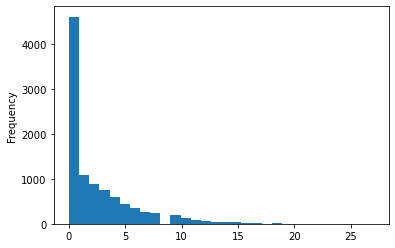

In [11]:
# check num of admin pages
ax = data['num_of_admin_pages'].plot.hist(bins=30)

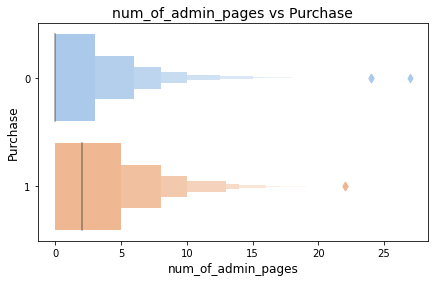

In [12]:
plot_boxen('num_of_admin_pages')

In [13]:
compute_stats('num_of_admin_pages')

num_of_admin_pages
  Most frequent: 0.0  Median: 1.0  Mean: 2.32
  3sigma: 12.33  Points above 3sigma: 181
  Number of Nulls: 605  Percentage of Nulls: 6.0 %
  Correlation with purchase: 0.145


In [14]:
# check potential cut off point for removing outliers, based on figure only
(data['num_of_admin_pages']>15).sum()

62

Observations:
* Num of admin page duration is exponentially distributed. Feature normalization (scaling) would be required.
* The threshold to remove outliers should be > 12.3 (3 sigma). To avoid losing a lot of data, we can use 15.
* Nulls can be replaced with 1 (median) or 0, since this is the most frequent value, and it is frequent for both purchase and non-purchase

### 2.2 Admin Page Duration

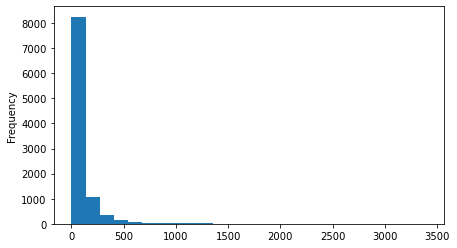

In [15]:
# check admin page duration
ax = data['admin_page_duration'].plot.hist(bins=25)

In [16]:
(data['admin_page_duration']==0).sum()

4819

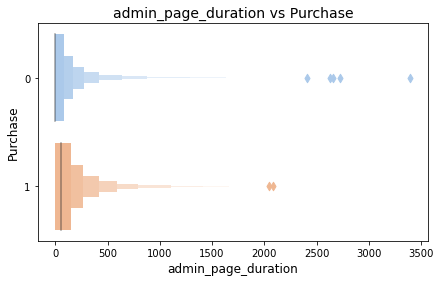

In [17]:
plot_boxen('admin_page_duration')

In [18]:
compute_stats('admin_page_duration')

admin_page_duration
  Most frequent: 0.0  Median: 8.0  Mean: 80.46
  3sigma: 618.12  Points above 3sigma: 184
  Number of Nulls: 413  Percentage of Nulls: 4.0 %
  Correlation with purchase: 0.098


In [19]:
(data['admin_page_duration']>1500).sum()

29

Observations:
* Admin page duration is exponentially distributed
* There are many outliers, especially in the "no purchase" case
* The threshold to remove outliers should be > 620 (3 sigma). To avoid losing a lot of data, we can use 1500.
* Nulls can be replaced by 0 (most frequent) or 8 (median)

### 2.3 Num of Info Pages

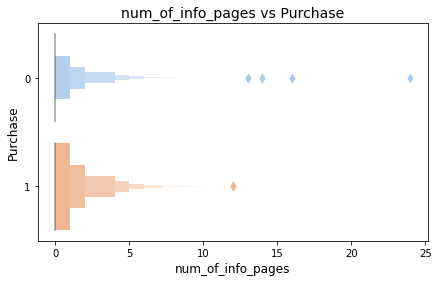

In [20]:
plot_boxen('num_of_info_pages')

In [21]:
compute_stats('num_of_info_pages')

num_of_info_pages
  Most frequent: 0.0  Median: 0.0  Mean: 0.5
  3sigma: 4.3  Points above 3sigma: 205
  Number of Nulls: 687  Percentage of Nulls: 7.0 %
  Correlation with purchase: 0.096


In [22]:
(data['num_of_info_pages']>12).sum()

4

Obersvations:
* There are many outliers, especially in the "no purchase" case
* The threshold to remove outliers should be > 4.3 (3 sigma). To avoid losing a lot of data, we can use 12.
* Nulls can be replaced by with the average num of info pages per user

### 2.4 Info Page Duration

In [23]:
# remove ' minutes' in data and convert to float
data['info_page_duration'] = data['info_page_duration'].str.replace(' minutes', '').astype('float')

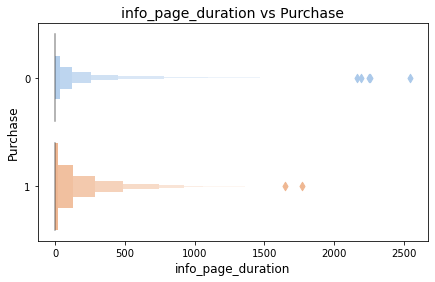

In [24]:
plot_boxen('info_page_duration')

In [25]:
compute_stats('info_page_duration')

info_page_duration
  Most frequent: 0.0  Median: 0.0  Mean: 34.32
  3sigma: 460.44  Points above 3sigma: 188
  Number of Nulls: 317  Percentage of Nulls: 3.0 %
  Correlation with purchase: 0.07


In [26]:
(data['info_page_duration']>1500).sum()

17

Observations:
* There are many outliers, especially in the "no purchase" case
* The threshold to remove outliers should be > 460 (3 sigma). To avoid losing a lot of data, we can use 1500
* The percentage of nulls is quite small, therefore we can replace the nulls with '0'

### 2.5 Num of Product Pages

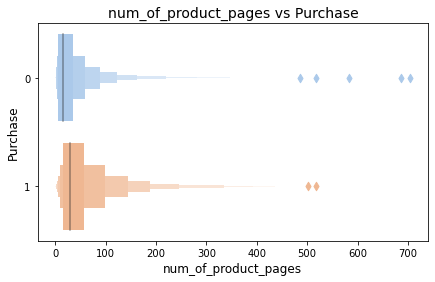

In [27]:
plot_boxen('num_of_product_pages')

In [28]:
compute_stats('num_of_product_pages')

num_of_product_pages
  Most frequent: 1.0  Median: 18.0  Mean: 31.87
  3sigma: 166.32  Points above 3sigma: 195
  Number of Nulls: 403  Percentage of Nulls: 4.0 %
  Correlation with purchase: 0.157


In [29]:
(data['num_of_product_pages']>350).sum()

26

Observations:
* Replacing nulls with 0 here is tricky, since this is not the most frequent value, nor the median
* Its possible to replace the nulls with the most frequent or with the mean

### 2.6 Product Page Duration

In [30]:
# remove 'minutes' in data and convert to float
data['product_page_duration'] = data['product_page_duration'].str.replace(' minutes', '').astype('float')

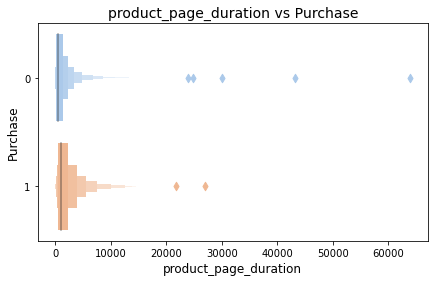

In [31]:
plot_boxen('product_page_duration')

In [32]:
compute_stats('product_page_duration')

product_page_duration
  Most frequent: 0.0  Median: 598.44  Mean: 1197.52
  3sigma: 7062.37  Points above 3sigma: 166
  Number of Nulls: 621  Percentage of Nulls: 6.0 %
  Correlation with purchase: 0.152


In [33]:
(data['product_page_duration']>20000).sum()

9

Observations:
* There are many outliers, especially in the "no purchase" case
* The threshold to remove outliers should be > 7062 (3 sigma). To avoid losing a lot of data, we can use 20000

### 2.7 Total Duration

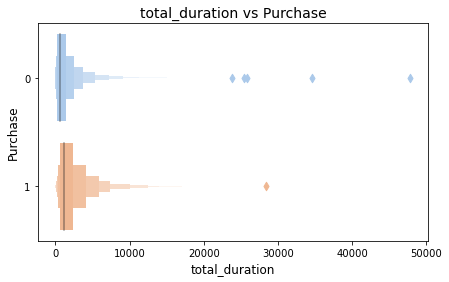

In [34]:
plot_boxen('total_duration')

In [35]:
compute_stats('total_duration')

total_duration
  Most frequent: 0.0  Median: 677.85  Mean: 1302.46
  3sigma: 7420.4  Points above 3sigma: 102
  Number of Nulls: 4753  Percentage of Nulls: 45.0 %
  Correlation with purchase: 0.145


Observations:
* There are many outliers, especially in the "no purchase" case
* The threshold to remove outliers should be > 7420 (3 sigma). To avoid losing a lot of data, we can use 20000
* Percentage of Nulls is very high, we should replace them or find other highly correlated feautre to replace this feature


### 2.8 Bounce Rates

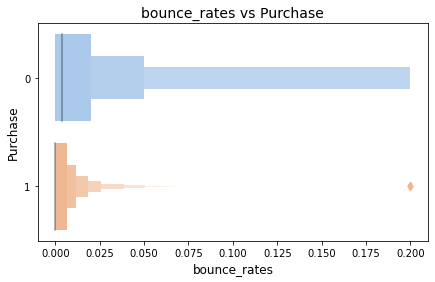

In [36]:
plot_boxen('bounce_rates')

In [37]:
compute_stats('bounce_rates')

bounce_rates
  Most frequent: 0.0  Median: 0.0  Mean: 0.02
  3sigma: 0.17  Points above 3sigma: 593
  Number of Nulls: 22  Percentage of Nulls: 0.0 %
  Correlation with purchase: -0.151


Observations:
* This feature is determined by calculating the number of bounces over the total number of pageviews to a page. A bounce occurs whenever a user enters the page and subsequently exits without visiting another page on the website or interacting with any of the elements on the page
* Distribution looks different for purchase and non-purchase, hinting that this feature would be an important predictor
* Replacing nulls with 0 is tricky here, as it distorts the distributions

### 2.9 Exit Rates

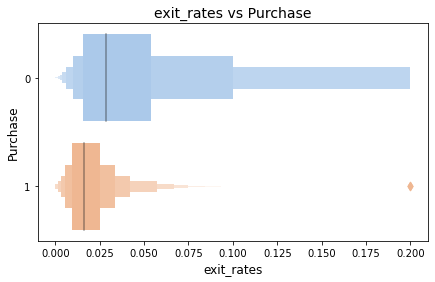

In [38]:
plot_boxen('exit_rates')

In [39]:
compute_stats('exit_rates')

exit_rates
  Most frequent: 0.2  Median: 0.03  Mean: 0.04
  3sigma: 0.19  Points above 3sigma: 595
  Number of Nulls: 26  Percentage of Nulls: 0.0 %
  Correlation with purchase: -0.208


Observations:
* Exit rate, looks at the number of people who exit your website after landing on a page and compares it to the total number of views the page received
* all bounces are exits but not all exits are bounces, therefore we decided to drop the exit_rate feature
* Distribution is (roughly) Gaussian, with some outliers, mainly when purchase was made. We will not remove outliers in this feature
* Distribution looks different for purchase and non-purchase, hinting that this feature would be an important predictor
* Replacing nulls with 0 is tricky here, as it distorts the distributions

### 2.10 Page Values

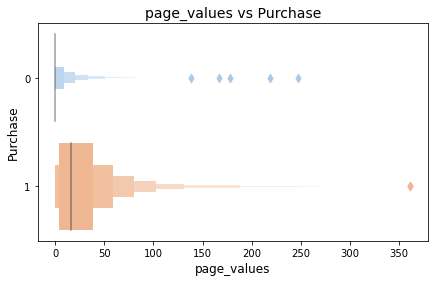

In [40]:
plot_boxen('page_values')

In [41]:
compute_stats('page_values')

page_values
  Most frequent: 0.0  Median: 0.0  Mean: 5.9
  3sigma: 62.08  Points above 3sigma: 217
  Number of Nulls: 27  Percentage of Nulls: 0.0 %
  Correlation with purchase: 0.486


Observations: 
* This feature is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's purchase.
* There is a huge difference between the distribution of this feature for purchase and non-purchase. This feature is an excellent indication of purchase likelihood.
* Replacing nulls with 0 is tricky here, as it biases the outcome towards no-purchase

### 2.11 Closeness to Holiday

In [42]:
data['closeness_to_holiday'].value_counts()

0.0    8958
0.6     290
0.8     266
0.4     199
0.2     147
1.0     123
Name: closeness_to_holiday, dtype: int64

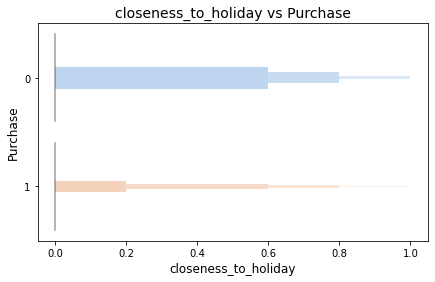

In [43]:
plot_boxen('closeness_to_holiday')

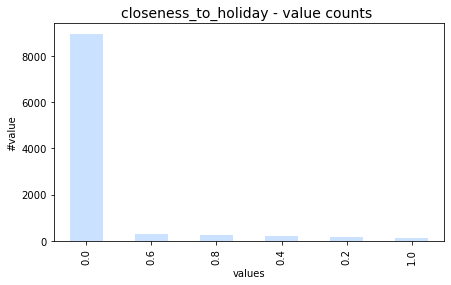

In [44]:
# simple plot
ax = data.closeness_to_holiday.value_counts().plot(kind='bar',color='#CAE1FF')
plt.title("closeness_to_holiday - value counts ", fontsize=14)
plt.xlabel('values',fontsize=10)
plt.ylabel('#value',fontsize=10)
plt.show()

In [45]:
compute_stats('closeness_to_holiday')

closeness_to_holiday
  Most frequent: 0.0  Median: 0.0  Mean: 0.06
  3sigma: 0.66  Points above 3sigma: 389
  Number of Nulls: 496  Percentage of Nulls: 5.0 %
  Correlation with purchase: -0.084


Observations:
* Only 6 values (a discrete numeric feature)
* No outliers
* 0.0 is most frequent (purchase on holiday)
* Need to decide what to do with 496 NULLs
* Right now we dont really understand the meaning and importance of this feature, need to study more

### 2.12 Month

In [46]:
# check months
data['month'].value_counts()

May     2857
Nov     2539
Mar     1615
Dec     1450
Oct      471
Sep      379
Jul      367
Aug      365
June     248
Feb      163
Name: month, dtype: int64

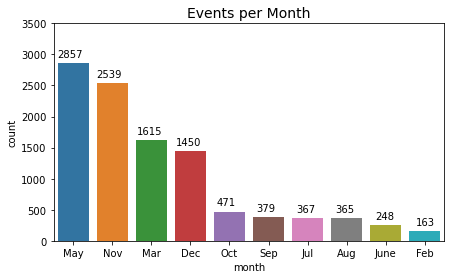

In [47]:
# plot months frequencies
monthly = data['month'].value_counts()

sns.countplot(data['month'], order=monthly.index)
plt.title('Events per Month', fontsize=14)
xval = -.42
plt.ylim(0,3500)

for index, value in monthly.items():
    plt.text(x=xval, y=value+95, s=str(value))
    xval += 1.02

Observations: 
* This is a categorical (not numerical) feature. If we keep it, it should be encoded
* January and April are missing. 


### 2.13 Device

In [48]:
# check device
data['device'].value_counts()

2.0    5429
1.0    2130
3.0    2120
4.0     388
8.0      64
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64

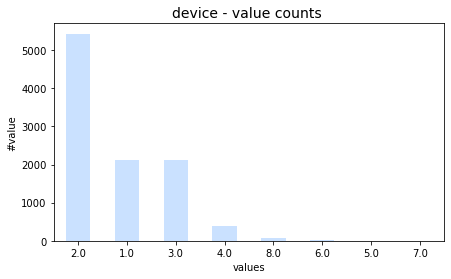

In [49]:
# simple plot
ax = data.device.value_counts().plot(kind='bar',color='#CAE1FF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
plt.title("device - value counts ", fontsize=14)
plt.xlabel('values',fontsize=10)
plt.ylabel('#value',fontsize=10)
plt.show()

Observations:
* There are 8 different devices
* Device 2.0 is the most frequent
* Null can be replaced with 2.0 (most frequent) or 0 (but no such device...)
* Although this a numerical feature, it should be treated as categorical (a value of 8 is not 8 times larger than 1). If we keep it, it should be encoded.

### 2.14 Internet Browser

In [50]:
# check Internet Browser
data['internet_browser'].value_counts()

chrome_89         1117
chrome_99.1.3     1101
chrome_99.1.4     1080
chrome_98.0.1     1078
chrome_90.1.7     1038
                  ... 
browser_12_v16       1
browser_13_v11       1
browser_9_v13        1
browser_7_v18        1
browser_11_v15       1
Name: internet_browser, Length: 126, dtype: int64

Observations:
* This is a categorical (not numerical) feature
* There are 126 different browsers
* Turning the column into one bit indicating Chrome / Not Chrome?



### 2.15 Region

In [51]:
data['region'].value_counts()

1.0    4056
3.0    2044
4.0     996
2.0     940
6.0     695
7.0     655
9.0     431
8.0     369
5.0     274
Name: region, dtype: int64

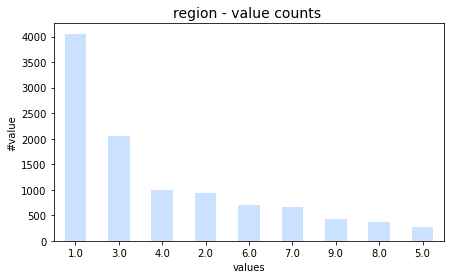

In [52]:
# simple plot
ax = data.region.value_counts().plot(kind='bar',color='#CAE1FF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
plt.title("region - value counts ", fontsize=14)
plt.xlabel('values',fontsize=10)
plt.ylabel('#value',fontsize=10)
plt.show()


Observations:
* There are 9 different regions
* Region 1.0 is the most frequent
* Null can be replaced with 1.0 (most frequent) 
* Although this a numerical feature, it should be treated as categorical

### 2.16 User Type

In [53]:
# check user type
data['user_type'].value_counts()

Returning_Visitor    8956
New_Visitor          1428
Other                  72
Name: user_type, dtype: int64

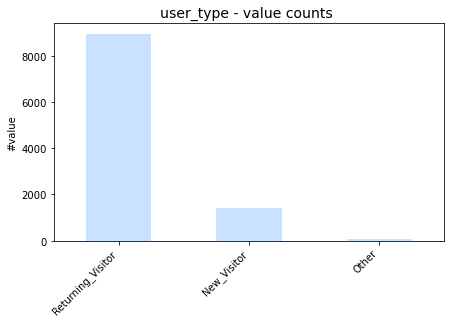

In [54]:
# simple plot
ax = data.user_type.value_counts().plot(kind='bar',color='#CAE1FF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("user_type - value counts ", fontsize=14)
plt.ylabel('#value',fontsize=10)
plt.show()

Observations:
* This is a categorical (not numerical) feature
* Returning_visitor is most frequent
* Can be replaced with two binary features, one indicating Returning_Visitor and one indicating New_Visitor
* nulls can be encoded as other 


### 2.17 Weekend

In [55]:
# check weekend
data['weekend'].value_counts()

False    8041
True     2415
Name: weekend, dtype: int64

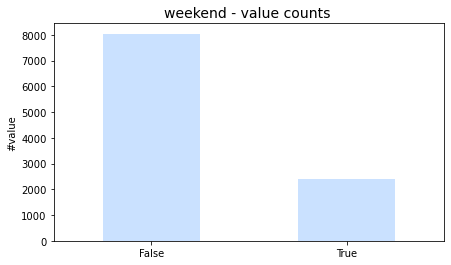

In [56]:
# simple plot
ax = data.weekend.value_counts().plot(kind='bar',color='#CAE1FF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
plt.title("weekend - value counts ", fontsize=14)
plt.ylabel('#value',fontsize=10)
plt.show()

Observations:
* This is a categorical (not numerical) feature
* It can be replaced with a single binary feature, with '1' for True and 0 for 'False'

### 2.18 A

In [57]:
# check column A
data['a'].value_counts()

c_2        3101
c_1        1944
c_3        1644
c_4         850
c_13        586
           ... 
c_20_50       1
c_20_76       1
c_20_48       1
c_20_92       1
c_20_88       1
Name: a, Length: 96, dtype: int64

Observations:
* This is a categorical (not numerical) feature
* It has 96 distinct values


In [58]:
data['a'].isnull().sum()

706

### 2.19 B

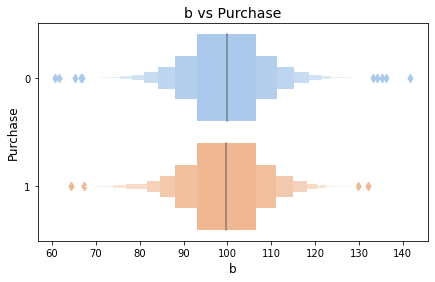

In [59]:
plot_boxen('b')

Observations:
* B is a numerical feature
* It is normally distributed, with mean around 100
* The distribution of B looks very similar when purchase is made or not, so the importance of this feature is probably low.

### 2.20 C

In [60]:
# check column C
data['c'].value_counts()

log200     1813
log400     1760
log404     1754
log8080    1748
log_100    1731
log202     1650
Name: c, dtype: int64

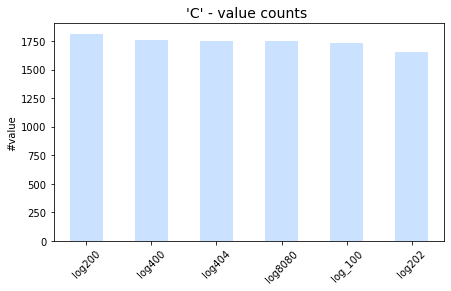

In [61]:
# simple plot
ax = data.c.value_counts().plot( kind='bar', color='#CAE1FF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("'C' - value counts ", fontsize=14)
plt.ylabel('#value',fontsize=10)
plt.show()

Observations:
* This is a categorical (not numerical) feature
* It has 6 values


### 2.21 D

Observations:
* This feature has mostly nulls. We will remove it.

### 2.22 Purchase

In [62]:
compute_stats('purchase')

purchase
  Most frequent: 0  Median: 0.0  Mean: 0.15
  3sigma: 1.24  Points above 3sigma: 0
  Number of Nulls: 0  Percentage of Nulls: 0.0 %
  Correlation with purchase: 1.0


In [63]:
# check frequency of purchase
data['purchase'].value_counts()


0    8858
1    1621
Name: purchase, dtype: int64

In [64]:
# Checking for nulls
data['purchase'].isnull().sum()

0

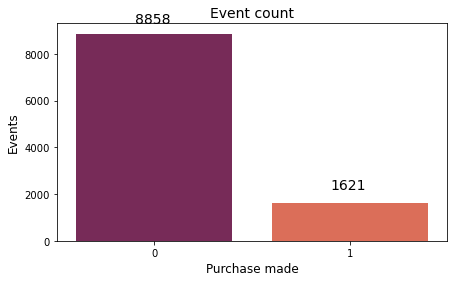

In [65]:
# plot frequency of purchase
sns.countplot(x = data['purchase'],palette = "rocket")
plt.title('Event count', fontsize= 14)
plt.xlabel('Purchase made', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.text(x=-.1, y=9300 ,s='8858', fontsize=14)
plt.text(x=.9, y=2200, s='1621', fontsize=14)
plt.show()

Observations:
* 84.5% of the events resulted in no purchase
* It means we have only few events with purchase. This should be taken into account
* A classifier that outputs always 0 (or 0.155, to indicate probability of purchase), would have accuracy of 84.5% on the training data. We must be better than that.

## 3. Checking all features

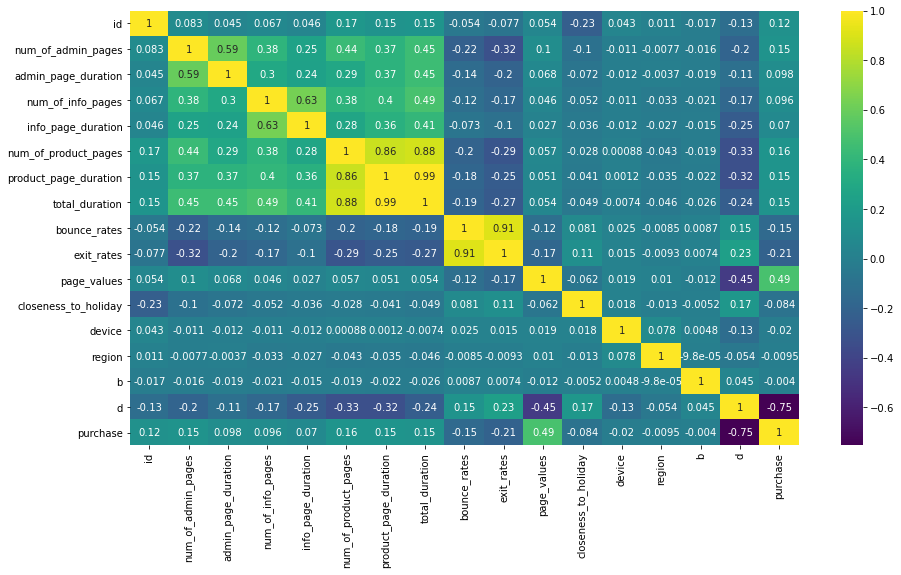

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')


Observations:
* Need to remove id column
* Chart shows only numeric columns
* Region has the lowest correlation with purchase, B is next
* D has the highest correlation with purchase, but we saw it is mostly empty (many nulls)
* page_values, exit_rates are the most correlated with purchase
* dropping "total_duration" feature since it has a very high correlation (0.99) with product_page_duration
* bounce_rates and exit_rates are highly correlated - do we need both?

In [67]:
feature_analysis = [
    ['id',                     'int64',    'Drop'  ],
    ['num_of_admin_pages',     'float64',	'Replace nulls with 0; remove outliers>15'],
    ['admin_page_duration',    'float64',  'Replace nulls with 0; remove outliers>1500'], 
    ['num_of_info_pages',      'float64',  'Replace nulls with 0; remove outliers>12'], 
    ['info_page_duration',     'object',   'remove minutes; convert to float; replace nulls with 0; replace outliers with most frequent value'], 
    ['num_of_product_pages',   'float64',  'Replace nulls with mean; replace outliers with threshold'],
    ['product_page_duration',  'object',   'remove minutes; convert to float; replace nulls with mean; drop outliers'], 
    ['total_duration',         'float64',	'dropping feature since it has a very high correlation (0.99) with product_page_duration'],
    ['bounce_rates',            'float64',  'Replace nulls with 0; not removing outliers because the outlier number is very small and they appear only when a purchase is made'],
    ['exit_rates',              'float64',	'Dropping feature because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on website. Therefore, all bounces are exits but not all exits are bounces.'],
    ['page_values',             'float64',	'Replace nulls with mean; drop outliers'],
    ['closeness_to_holiday',   'float64',	'No outliers; replace nulls with most frequent value; encode'],
    ['month',                  'object', 	'Dividing feature into 4 seasons to reduce number of features before encoding; encoding; dropping nulls'],
    ['device',                 'float64',  'Replace nulls with most frequent value; encode'],
    ['internet_browser',       'object', 	'Encode; Convert to Chrome / non Chrome; replace nulls with 0'],
    ['region',                 'float64',  'Replace nulls with most frequent value; encode'],
    ['user_type',              'object', 	'Encode; replace nulls with "other"'],
    ['weekend',                'object', 	'Encode'],
    ['a',                      'object', 	'Replace nulls to most frequent value; encode'],
    ['b',                      'float64',	'Drop (not informative)'],
    ['c',		               'object',	'Drop nulls; Encode'],
    ['d',                      'float64',  'Drop (too many nulls)']
]
feature_summary = pd.DataFrame(feature_analysis, columns=['Feature name', 'Type', 'Comments'])
table = feature_summary.style.set_properties(**{'text-align': 'left'})
table

,Feature name,Type,Comments
0,id,int64,Drop
1,num_of_admin_pages,float64,Replace nulls with 0; remove outliers>15
2,admin_page_duration,float64,Replace nulls with 0; remove outliers>1500
3,num_of_info_pages,float64,Replace nulls with 0; remove outliers>12
4,info_page_duration,object,remove minutes; convert to float; replace nulls with 0; replace outliers with most frequent value
5,num_of_product_pages,float64,Replace nulls with mean; replace outliers with threshold
6,product_page_duration,object,remove minutes; convert to float; replace nulls with mean; drop outliers
7,total_duration,float64,dropping feature since it has a very high correlation (0.99) with product_page_duration
8,bounce_rates,float64,Replace nulls with 0; not removing outliers because the outlier number is very small and they appear only when a purchase is made
9,exit_rates,float64,"Dropping feature because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on website. Therefore, all bounces are exits but not all exits are bounces."


## 4. Preprocessing

In the following section we will process our data according to the table above. Little by little we worked on each data frame removing outliers, dealing with nulls, encoding categorical features and creating new features, in order to reach our "final data" in the end.

### 4.1 First, very basic processing
* Use only numeric features
* Change all nulls to 0
* No outlier removal

In [68]:
# create a working copy of data (so that we can later bring back columns that we drop in early stages)
df1 = data.copy()

# remove the id column, all non numeric columns, A, B, C, D
df1.drop(['id','month','internet_browser','user_type','weekend','a','b','c','d'], inplace=True, axis=1)

# remove region (smallest correlation with purchase, should be categorical)
df1.drop(['region'], inplace=True, axis=1)

# replace all missing values with 0
df1 = df1.fillna(0)

# get label
y1 = df1['purchase']
df1.drop(['purchase'], inplace=True, axis=1)


### 4.2 Removing outliers from numeric features and dealing with nulls

In [69]:
# create a working copy of data (so that we can later bring back columns that we drop in early stages)
df2 = data.copy()

# remove the id column, all non numeric columns, A, B, C, D
df2.drop(['id','month','internet_browser','user_type','weekend','a','b','c','d','closeness_to_holiday','device'], inplace=True, axis=1)

# remove region (smallest correlation with purchase, should be categorical)
df2.drop(['region'], inplace=True, axis=1)

# 2.1 replacing outliers in 'num_of_admin_pages' with calculated threshold
df2['num_of_admin_pages'].loc[df2['num_of_admin_pages'] > 15] = 12.3
df2['num_of_admin_pages'].fillna(0, inplace=True)

# 2.2 dropping outliers in 'admin_page_duration'
df2 = df2.drop(df2[df2['admin_page_duration'] > 1500].index)
df2['admin_page_duration'].fillna(0,inplace=True)

# 2.3 dropping outliers in 'num_of_info_pages'
df2 = df2.drop(df2[df2['num_of_info_pages'] > 12].index)
df2['num_of_info_pages'].fillna(0,inplace=True)

# 2.4 replacing outliers in 'info_page_duration' with most frequent value
df2['info_page_duration'].loc[df2['info_page_duration'] > 1500] = 0
df2['info_page_duration'].fillna(0,inplace=True)

# 2.5 replacing outliers in "num_of_product_pages" with threshold and replacing nulls with mean
df2['num_of_product_pages'].loc[df2['num_of_product_pages'] > 1500] = 166.32
df2['num_of_product_pages'].fillna(31.87,inplace=True)

# 2.6 dropping outliers in "product_page_duration" and replacing nulls with mean
df2 = df2.drop(df2[df2['product_page_duration'] > 20000].index)
df2['product_page_duration'].fillna(1197.52,inplace=True)

# 2.7 dropping "total_duration" feature since it has a very high correlation (0.99) with product_page_duration
df2 = df2.drop(columns = ['total_duration'])

# 2.8 not removing outliers in "bounce_rates" because the outlier number is very small and they appear only when a purchase is made
# replacing nulls with 0
df2['bounce_rates'].fillna(0,inplace=True)

# 2.9 dropping "exit_rates" feature because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on your website. 
# Therefore, all bounces are exits but not all exits are bounces.
df2 = df2.drop(columns = ['exit_rates'])

# 2.10 dropping 2 outliers in "page_values" and replacing nulls with mean
df2 = df2.drop(df2[df2['page_values'] > 300].index)
df2['page_values'].fillna(6,inplace=True) 

# get label
y2 = df2['purchase']
df2.drop(['purchase'], inplace=True, axis=1)


### 4.3 Encoding user_type


In [70]:
# create a working copy of data (so that we can later bring back columns that we drop in early stages)
df3 = data.copy()

# remove the id column, all non numeric columns, A, B, C, D
df3.drop(['id','month','internet_browser','weekend','a','b','c','d'], inplace=True, axis=1)

# remove region (smallest correlation with purchase, should be categorical)
df3.drop(['region'], inplace=True, axis=1)

# Changing all nulls of user_type to others
df3['user_type'].fillna('Other',inplace=True)

# Encoding user_type and removing two columns
ut_dummies= pd.get_dummies(df3['user_type'],prefix='user_type')
df3 = pd.concat([df3, ut_dummies], axis=1)
df3 = df3.drop(columns=['user_type_Other','user_type'])

# get label
y3 = df3['purchase']
df3.drop(['purchase'], inplace=True, axis=1)


Suggestions for later feature engineering:
* Encode 'user_type' and add it back
* Encode 'Month' and add it back
* Convert 'Weekend' to binary and add it back

This dataframe was used only for development and testing.

### 4.4 Encoding Months 


In [71]:
df4 = data.copy()

# remove the id column, all non numeric columns, A, B, C, D
df4.drop(['id','user_type','internet_browser','weekend','a','b','c','d'], inplace=True, axis=1)

# remove region (smallest correlation with purchase, should be categorical)
df4.drop(['region'], inplace=True, axis=1)

# dividing 'months' feature into 4 seasons to reduce number of features before encoding
season = pd.Series([])

for i in range(len(df4)):
    if df4["month"][i] == 'Feb' or df4["month"][i] == 'Dec':
        season[i] = 'winter'
    elif df4["month"][i] == 'Sep' or df4["month"][i] == 'Oct' or df4["month"][i] == 'Nov':
        season[i] = 'fall'
    elif df4["month"][i] == 'June' or df4["month"][i] == 'Jul' or df4["month"][i] == 'Aug':
        season[i] = 'summer'
    elif df4["month"][i] == 'Mar' or df4["month"][i] == 'May':
        season[i] = 'spring'

df4.insert(13,'season',season)
df4['season'].value_counts()

# Encoding season (the new feature)
ut_dummies= pd.get_dummies(df4['season'],prefix='season')
df4 = pd.concat([df4, ut_dummies], axis=1)
df4 = df4.drop(columns='season')

#dropping 25 nulls
df4 = df4.dropna(subset=['season_fall','season_spring','season_summer','season_winter'])

# get label
y4 = df4['purchase']
df4.drop(['purchase'], inplace=True, axis=1)


Note: this dataframe was used only for development and testing.

### 4.5 Encoding internet_browser, weekend, device, region, c 


In [72]:
df5 = data.copy()

# remove the id column, all non numeric columns, A, B, C, D
df5.drop(['id','user_type','month','a','b','d'], inplace=True, axis=1)

#adding a new column
is_chrome = pd.Series([])
df5.insert(10,'is_chrome',is_chrome)

## Encoding internet browser

#putting 1 when using chrome and 0 when not using chrome
df5.is_chrome[(df5['is_chrome'].isnull())&(df5['internet_browser'].str.contains('chrome'))] = 1
df5.is_chrome[(df5['is_chrome'].isnull())&(df5['internet_browser'].str.contains('chrome')==False)] = 0

# replace nulls with 0
df5['is_chrome'].fillna(0,inplace=True)

# dropping internet_browser column after encoding
df5 = df5.drop(columns='internet_browser')


## Encoding weekend

ut_dummies= pd.get_dummies(df5['weekend'],prefix='on_weekend')
df5 = pd.concat([df5, ut_dummies], axis=1)
# dropping weekend column after encoding
df5.drop(['weekend','on_weekend_False'], inplace=True, axis=1)
df5.rename(columns = {'on_weekend_True':'on_weekend'} ,inplace = True)


## Encoding device

# Replacing nulls with most frequent device - (2.0)
df5['device'].fillna(2.0,inplace=True) 
ut_dummies1= pd.get_dummies(df5['device'],prefix='device')
df5 = pd.concat([df5, ut_dummies1], axis=1)
# dropping device column after encoding
df5.drop(['device'], inplace=True, axis=1)

## Encoding region

# Replacing nulls with most frequent region - (1.0)
df5['region'].fillna(1.0,inplace=True) 
ut_dummies2= pd.get_dummies(df5['region'],prefix='region')
df5 = pd.concat([df5, ut_dummies2], axis=1)
# dropping region column after encoding
df5.drop(['region'], inplace=True, axis=1)

## Encoding C

# Dropping 23 nulls
df5 = df5.dropna(subset=['c']) 
ut_dummies3= pd.get_dummies(df5['c'],prefix='c')
df5 = pd.concat([df5, ut_dummies3], axis=1)
# dropping c column after encoding
df5.drop(['c'], inplace=True, axis=1)

## Encoding closeness_to_holiday

# Replacing nulls with most frequent value - (0.0)
df5['closeness_to_holiday'].fillna(0.0,inplace=True)  
ut_dummies4= pd.get_dummies(df5['closeness_to_holiday'],prefix='closeness_to_holiday')
df5 = pd.concat([df5, ut_dummies4], axis=1)
# dropping closeness_to_holiday column after encoding
df5.drop(['closeness_to_holiday'], inplace=True, axis=1)

# get label
y5 = df5['purchase']
df5.drop(['purchase'], inplace=True, axis=1)


Note: This dataframe was used only for development and testing.

### 4.5.A Encoding A

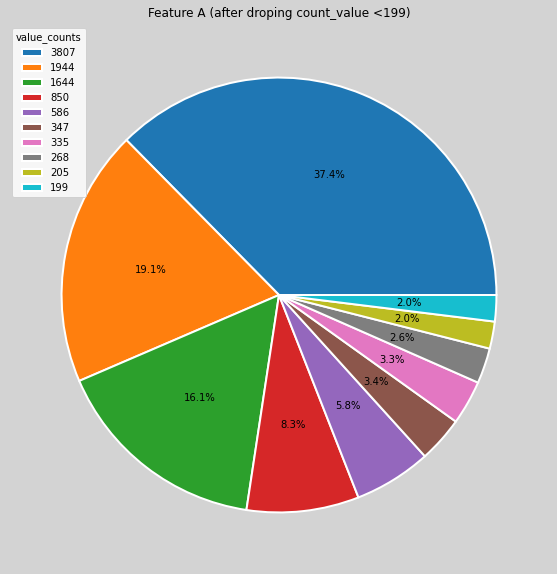

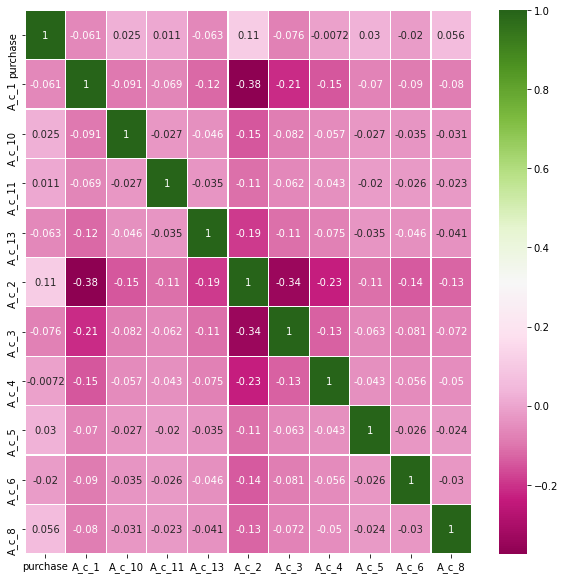

In [73]:
dfA = data.copy()

# removing all features except 'A'
dfA.drop(['id','month','internet_browser','user_type','weekend','c','closeness_to_holiday','device','region'], inplace=True, axis=1)
dfA.drop(['num_of_admin_pages','admin_page_duration','num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','bounce_rates','exit_rates','page_values','b','d'], inplace=True, axis=1)


# Changing all nulls of 'a' to most frequent value
dfA['a'].fillna('c_2',inplace=True)

count = pd.Series([])
dfA['count']=count
dfA['count']=dfA.groupby('a')['a'].transform('size')
dfA = dfA.drop(dfA[dfA['count']<199].index)
dfA.drop(['count'], inplace=True, axis=1)     

# Drawing pie chart after dropping all values below 199 since they were very few
x =dfA.a.value_counts()
fig = plt.figure(figsize =(10, 10))
fig.set_facecolor('lightgrey')
colors = plt.get_cmap('cool')(np.linspace(0.2, 0.7, len(x)))
plt.pie(x, wedgeprops={"linewidth": 2,"edgecolor": "white"},center=(4, 4),autopct='%.1f%%')
plt.legend(labels=x,loc='upper left', title ="value_counts",)
plt.title("Feature A (after droping count_value <199)")
plt.show()


# Encoding 'a'
ut_dummies_A= pd.get_dummies(dfA['a'],prefix='A')
dfA = pd.concat([dfA, ut_dummies_A], axis=1)
dfA.head()

# Drawing heatmap to check correlation between different 'a' features and purchase
plt.figure(figsize=(10,10))
sns.heatmap(dfA.corr(),annot=True,cmap='PiYG',linewidths=.3)



Observations:

* According to the pie chart we can see which value of 'a' is most frequent
* According to the heatmap we can see the correaltion between different 'a'a values
* In addition we can see that the correlation between 'a' and 'purchase' is quite low

This dataframe was used only for development and testing.

### 4.6 Encoding all categorical features (without numeric features)

In [74]:
# create a working copy of data (so that we can later bring back columns that we drop in early stages)
df6 = data.copy()

# remove the id column, all numeric columns, A, B, D
df6.drop(['id','num_of_admin_pages','admin_page_duration','num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','bounce_rates','exit_rates','page_values','a','b','d'], inplace=True, axis=1)

## Encoding user_type

# Changing all nulls of user_type to others
df6['user_type'].fillna('Other',inplace=True)

# Encoding user_type and removing two columns
ut_dummies= pd.get_dummies(df6['user_type'],prefix='user_type')
df6 = pd.concat([df6, ut_dummies], axis=1)
df6 = df6.drop(columns=['user_type_Other','user_type'])

## Encoding month

# dividing 'months' feature into 4 seasons to reduce number of features before encoding
season = pd.Series([])
for i in range(len(df6)):
    if df6["month"][i] == 'Feb' or df6["month"][i] == 'Dec':
        season[i] = 'winter'
    elif df6["month"][i] == 'Sep' or df6["month"][i] == 'Oct' or df6["month"][i] == 'Nov':
        season[i] = 'fall'
    elif df6["month"][i] == 'June' or df6["month"][i] == 'Jul' or df6["month"][i] == 'Aug':
        season[i] = 'summer'
    elif df6["month"][i] == 'Mar' or df6["month"][i] == 'May':
        season[i] = 'spring'

df6['season']=season

# Encoding season (the new feature)

ut_dummies_1  = pd.get_dummies(df6['season'],prefix='season')
df6 = pd.concat([df6, ut_dummies_1], axis=1)
df6 = df6.drop(columns=['season','month'])

#dropping 25 nulls
df6 = df6.dropna(subset=['season_fall','season_spring','season_summer','season_winter'])

## Encoding internet_browser

#adding a new column
is_chrome = pd.Series([])
df6['is_chrome']=is_chrome

#putting 1 when using chrome and 0 when not using chrome
df6.is_chrome[(df6['is_chrome'].isnull())&(df6['internet_browser'].str.contains('chrome'))] = 1
df6.is_chrome[(df6['is_chrome'].isnull())&(df6['internet_browser'].str.contains('chrome')==False)] = 0

#replace nulls with 0
df6['is_chrome'].fillna(0,inplace=True)

# dropping internet_browser column after encoding
df6 = df6.drop(columns='internet_browser')

## Encoding weekend

ut_dummies_2 = pd.get_dummies(df6['weekend'],prefix='on_weekend')
df6 = pd.concat([df6, ut_dummies_2], axis=1)
# dropping weekend column after encoding
df6.drop(['weekend','on_weekend_False'], inplace=True, axis=1)
df6.rename(columns = {'on_weekend_True':'on_weekend'} ,inplace = True)

## Encoding device

# Replacing nulls with most frequent device - (2.0)
df6['device'].fillna(2.0,inplace=True) 
ut_dummies_3= pd.get_dummies(df6['device'],prefix='device')
df6 = pd.concat([df6, ut_dummies_3], axis=1)
# dropping device column after encoding
df6.drop(['device'], inplace=True, axis=1)

## Encoding region

# Replacing nulls with most frequent region - (1.0)
df6['region'].fillna(1.0,inplace=True) 
ut_dummies_4= pd.get_dummies(df6['region'],prefix='region')
df6 = pd.concat([df6, ut_dummies_4], axis=1)
# dropping region column after encoding
df6.drop(['region'], inplace=True, axis=1)

## Encoding C

# Dropping 23 nulls
df6 = df6.dropna(subset=['c']) 
ut_dummies_5= pd.get_dummies(df6['c'],prefix='c')
df6 = pd.concat([df6, ut_dummies_5], axis=1)
# dropping c column after encoding
df6.drop(['c'], inplace=True, axis=1)

## Encoding closeness_to_holiday

# Replacing nulls with most frequent value - (0.0)
df6['closeness_to_holiday'].fillna(0.0,inplace=True)  
ut_dummies_6= pd.get_dummies(df6['closeness_to_holiday'],prefix='closeness_to_holiday')
df6 = pd.concat([df6, ut_dummies_6], axis=1)
# dropping closeness_to_holiday column after encoding
df6.drop(['closeness_to_holiday'], inplace=True, axis=1)

# get label
y6 = df6['purchase']
df6.drop(['purchase'], inplace=True, axis=1)

### 4.7 Numeric & categorical (encoded) features

In [75]:
df7 = data.copy()
# remove the id column,B, D
df7.drop(['id','b','d'], inplace=True, axis=1)

# 2.1 replacing outliers in 'num_of_admin_pages' with calculated threshold
df7['num_of_admin_pages'].loc[df7['num_of_admin_pages'] > 15] = 12.3
df7['num_of_admin_pages'].fillna(0, inplace=True)

# 2.2 dropping outliers in 'admin_page_duration'
df7 = df7.drop(df7[df7['admin_page_duration'] > 1500].index)
df7['admin_page_duration'].fillna(0,inplace=True)

# 2.3 dropping outliers in 'num_of_info_pages'
df7 = df7.drop(df7[df7['num_of_info_pages'] > 12].index)
df7['num_of_info_pages'].fillna(0,inplace=True)

# 2.4 replacing outliers in 'info_page_duration' with most frequent value
df7['info_page_duration'].loc[df7['info_page_duration'] > 1500] = 0
df7['info_page_duration'].fillna(0,inplace=True)

# 2.5 replacing outliers in "num_of_product_pages" with threshold and replacing nulls with mean
df7['num_of_product_pages'].loc[df7['num_of_product_pages'] > 1500] = 166.32
df7['num_of_product_pages'].fillna(31.87,inplace=True)

# 2.6 dropping outliers in "product_page_duration" and replacing nulls with mean
df7 = df7.drop(df7[df7['product_page_duration'] > 20000].index)
df7['product_page_duration'].fillna(1197.52,inplace=True)

# 2.7 dropping "total_duration" feature since it has a very high correlation (0.99) with product_page_duration
df7 = df7.drop(columns = ['total_duration'])

# 2.8 not removing outliers in "bounce_rates" because the outlier number is very small and they appear only when a purchase is made
# replacing nulls with 0
df7['bounce_rates'].fillna(0,inplace=True)

# 2.9 dropping "exit_rates" feature because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on your website. 
# Therefore, all bounces are exits but not all exits are bounces.
df7 = df7.drop(columns = ['exit_rates'])

# 2.10 dropping 2 outliers in "page_values" and replacing nulls with mean
df7 = df7.drop(df7[df7['page_values'] > 300].index)
df7['page_values'].fillna(6,inplace=True) 

## Encoding user_type

# Changing all nulls of user_type to others
df7['user_type'].fillna('Other',inplace=True)

# Encoding user_type and removing two columns
ut_dummies= pd.get_dummies(df7['user_type'],prefix='user_type')
df7 = pd.concat([df7, ut_dummies], axis=1)
df7 = df7.drop(columns=['user_type_Other','user_type'])


## Encoding month

# dividing 'months' feature into 4 seasons to reduce number of features before encoding
season = pd.Series([])
df7['season']=season
df7.loc[df7["month"] == "Feb", "season"] = "winter"
df7.loc[df7["month"] == "Dec", "season"] = "winter"
df7.loc[df7["month"] == "Sep", "season"] = "fall"
df7.loc[df7["month"] == "Oct", "season"] = "fall"
df7.loc[df7["month"] == "Nov", "season"] = "fall"
df7.loc[df7["month"] == "June", "season"] = "summer"
df7.loc[df7["month"] == "Jul", "season"] = "summer"
df7.loc[df7["month"] == "Aug", "season"] = "summer"
df7.loc[df7["month"] == "Mar", "season"] = "spring"
df7.loc[df7["month"] == "May", "season"] = "spring"

# Encoding season (the new feature)

ut_dummies_1  = pd.get_dummies(df7['season'],prefix='season')
df7 = pd.concat([df7, ut_dummies_1], axis=1)
df7 = df7.drop(columns=['season','month'])

#dropping 25 nulls
df7 = df7.dropna(subset=['season_fall','season_spring','season_summer','season_winter'])

## Encoding internet_browser

# adding a new column
is_chrome = pd.Series([])
df7['is_chrome']=is_chrome

# putting 1 when using chrome and 0 when not using chrome
df7.is_chrome[(df7['is_chrome'].isnull())&(df7['internet_browser'].str.contains('chrome'))] = 1
df7.is_chrome[(df7['is_chrome'].isnull())&(df7['internet_browser'].str.contains('chrome')==False)] = 0

# replaced nulls with 0 
df7['is_chrome'].fillna(0,inplace=True)

# dropping internet_browser column after encoding
df7 = df7.drop(columns='internet_browser')

## Encoding weekend

ut_dummies_2 = pd.get_dummies(df7['weekend'],prefix='on_weekend')
df7 = pd.concat([df7, ut_dummies_2], axis=1)

# dropping weekend column after encoding
df7.drop(['weekend','on_weekend_False'], inplace=True, axis=1)
df7.rename(columns = {'on_weekend_True':'on_weekend'} ,inplace = True)

## Encoding device

# Replacing nulls with most frequent device - (2.0)
df7['device'].fillna(2.0,inplace=True) 
ut_dummies_3= pd.get_dummies(df7['device'],prefix='device')
df7 = pd.concat([df7, ut_dummies_3], axis=1)
# dropping device column after encoding
df7.drop(['device'], inplace=True, axis=1)

## Encoding region

# Replacing nulls with most frequent region - (1.0)
df7['region'].fillna(1.0,inplace=True) 
ut_dummies_4= pd.get_dummies(df7['region'],prefix='region')
df7 = pd.concat([df7, ut_dummies_4], axis=1)
# dropping region column after encoding
df7.drop(['region'], inplace=True, axis=1)

## Encoding C

# Dropping 23 nulls
df7 = df7.dropna(subset=['c']) 
ut_dummies_5= pd.get_dummies(df7['c'],prefix='c')
df7 = pd.concat([df7, ut_dummies_5], axis=1)
# dropping c column after encoding
df7.drop(['c'], inplace=True, axis=1)

## Encoding closeness_to_holiday

# Replacing nulls with most frequent value - (0.0)
df7['closeness_to_holiday'].fillna(0.0,inplace=True)  
ut_dummies_6= pd.get_dummies(df7['closeness_to_holiday'],prefix='closeness_to_holiday')
df7 = pd.concat([df7, ut_dummies_6], axis=1)

# dropping closeness_to_holiday column after encoding
df7.drop(['closeness_to_holiday'], inplace=True, axis=1)

## Encoding 'a' 

# Changing all nulls of 'a' to most frequent value
df7['a'].fillna('c_2',inplace=True)

# Adding count column and removing all values below 199 
count = pd.Series([])
df7['count']=count
df7['count']=df7.groupby('a')['a'].transform('size')
df7 = df7.drop(df7[df7['count']<199].index)

# Encoding 'a' and removing 'count' and 'a' columns 
ut_dummies_6 = pd.get_dummies(df7['a'],prefix='A')
df7 = pd.concat([df7, ut_dummies_6], axis=1)
df7.drop(['count'], inplace=True, axis=1)
df7.drop(['a'], inplace=True, axis=1)

# Displaying final data 
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
df7.head(10)

# get label
y7 = df7['purchase']
df7.drop(['purchase'], inplace=True, axis=1)

df7.shape


(10128, 55)

### 4.8 Scaling and PCA

### Dividing the data

In [76]:
# Split dataset
X_train_PCA, X_valid_PCA, y_train_PCA, y_valid_PCA = train_test_split(df7, y7, train_size=0.8, test_size=0.2, random_state=0)

### Normalization

in order to use PCA, we understand that we first need to scale our data. PCA is used to find correaltion between the different features, and if some of them are not normalized, it distorts the correalted matrix.

In [77]:
# Trying StandartScaler as an option for scaling
scaler = preprocessing.StandardScaler().fit(X_train_PCA)

X_train_scaled_s = scaler.transform(X_train_PCA)
X_valid_scaled_s = scaler.transform(X_valid_PCA)


In [78]:
# Trying Power Transformer instead of Standard Scaler

scaler = preprocessing.PowerTransformer().fit(X_train_PCA)

X_train_scaled_p = scaler.transform(X_train_PCA)
X_valid_scaled_p = scaler.transform(X_valid_PCA)

#### PCA

In [79]:
# Function for PCA components
def get_principal_components(X: np.array, p: float) -> np.array:
    pca = PCA(p).fit(X)
    return(pca.components_)
    

In [80]:
# PCA for StandartScaler Data
components_s = get_principal_components(X_train_scaled_s,0.99)
print(f'number of components which preserve at least 99% of the variance: {len(components_s)}')


number of components which preserve at least 99% of the variance: 46


In [81]:
# PCA for PowerTransformer Data
components_p = get_principal_components(X_train_scaled_p,0.99)
print(f'number of components which preserve at least 99% of the variance: {len(components_p)}')

number of components which preserve at least 99% of the variance: 45


In [82]:
# Transform features using PCA (StandardScaler)
X_train_PCA_s = np.dot(X_train_scaled_s, components_s.T)
X_valid_PCA_s = np.dot(X_valid_scaled_s, components_s.T)

In [83]:
# Transform features using PCA (PowerTransformer)
X_train_PCA_p = np.dot(X_train_scaled_p, components_p.T)
X_valid_PCA_p = np.dot(X_valid_scaled_p, components_p.T)

## 5. Modeling

In this section we checked several models on our data:
1. Guassian Naive Bayes
2. Logistic Regression
3. Random Forest
4. SVM

For each model, we calculated the AUC score and compared between different data frames using the same model.
Afterwards we chose the data frame that gave the best AUC score from each model.
In the summary of this section we will choose the best model with the highest AUC score and will use it to predict the test data.

#### Dividing the data (in the comments we tried different data frames)

In [84]:
# Split dataset

#X_train, X_valid, y_train, y_valid = train_test_split(df1, y1, train_size=0.8, test_size=0.2, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(df2, y2, train_size=0.8, test_size=0.2, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(df6, y6, train_size=0.8, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(df7, y7, train_size=0.8, test_size=0.2, random_state=0)

### 5.1 Gaussian Naive Bayes

In [85]:
def gauss_na_bayes(name, X_train, Y_train, x_valid, y_valid):

    gnb = GaussianNB() 
    gnb.fit(X_train,Y_train)
    auc_train = roc_auc_score(Y_train, gnb.predict_proba(X_train)[:, 1])
    auc_valid = roc_auc_score( y_valid, gnb.predict_proba(x_valid)[:, 1])
    print("Gaussian Naive Bayes - "+name+":\n"+"Training AUC: "+ str(round(auc_train,4))+"\n"+"Validation AUC: "+str(round(auc_valid,4))+"\n")

#gauss_na_bayes('df1',X_train,y_train,X_valid,y_valid)
#gauss_na_bayes('df2',X_train,y_train,X_valid,y_valid)
#gauss_na_bayes('df6',X_train,y_train,X_valid,y_valid)
#gauss_na_bayes('df7',X_train,y_train,X_valid,y_valid)
#gauss_na_bayes('df7',X_train_PCA_s,y_train_PCA,X_valid_PCA_s,y_valid_PCA)
gauss_na_bayes('df7',X_train_PCA_p,y_train_PCA,X_valid_PCA_p,y_valid_PCA)

Gaussian Naive Bayes - df7:
Training AUC: 0.8944
Validation AUC: 0.8734



In [86]:
# Prepare summary table for Guassian Naive Bayes
results_table = [
    ['Basic processing (Numeric only)',   'df1'    ,                        'Naive Bayes',      '0.8281'  ],
    ['Numeric only (without NAs & outliers)','df2' ,      'Naive Bayes',	        '0.8469'],
    ['Categorical only','df6' ,   'Naive Bayes',          '0.642'], 
    ['Final Data','df7' ,   'Naive Bayes',          '0.7931'],
    ['Final Data using PCA (PowerTransformer Scaling)','df7' ,   'Naive Bayes',          '0.8734'],
    ['Final Data using PCA (StandardScaler)','df7' ,   'Naive Bayes',          '0.8045'],  
]
results_summary = pd.DataFrame(results_table, columns=['Features','Data frame','Model', 'Validation AUC'])
table = results_summary.style.set_properties(**{'text-align': 'left'})
table

,Features,Data frame,Model,Validation AUC
0,Basic processing (Numeric only),df1,Naive Bayes,0.8281
1,Numeric only (without NAs & outliers),df2,Naive Bayes,0.8469
2,Categorical only,df6,Naive Bayes,0.642
3,Final Data,df7,Naive Bayes,0.7931
4,Final Data using PCA (PowerTransformer Scaling),df7,Naive Bayes,0.8734
5,Final Data using PCA (StandardScaler),df7,Naive Bayes,0.8045



After testing several different data frames, we discovered that the best AUC score is while using the final data with PCA and PowerTransformer scaling. From now on, we will keep using the PowerTransformer Scaling since it gives better results compared to StandardScaler.

### 5.2 Log Reg

In order to use logistic regression the data has to be normalized. Our data frames were not normalized (except the data we used PCA on), therefore we wrote a scaler function to scale the unscaled data frames

In [87]:
# Scaler function using Standard Scaler which normalizes the data frame
def scaler(X_train,X_valid):
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    return(X_train_scaled,X_valid_scaled)


In [88]:
# Logistic Regression function
def log_regg(name, X_train, Y_train, x_valid, y_valid):
    # Train Logistic Regression 
    log_reg = LogisticRegression().fit(X_train, Y_train)

    #all of the measures that we want to calculate
    auc_train = roc_auc_score(Y_train, log_reg.predict_proba(X_train)[:, 1])
    auc_valid = roc_auc_score(y_valid, log_reg.predict_proba(x_valid)[:, 1])
    
    print("Logistic Regression - "+name+":\n"+"Training AUC: "+ str(round(auc_train,4))+"\n"+"Validation AUC: "+str(round(auc_valid,4))+"\n")

#log_regg('df7',X_train_PCA_p,y_train_PCA,X_valid_PCA_p,y_valid_PCA)

X_train_scaled,X_valid_scaled=scaler(X_train, X_valid)
log_regg('df7_no_pca',X_train_scaled,y_train,X_valid_scaled,y_valid)


Logistic Regression - df7_no_pca:
Training AUC: 0.9031
Validation AUC: 0.8742



In [89]:
# Prepare summary table 
results_table = [
    ['Basic processing (Numeric only)',   'df1'    ,                        'Logistic Regression',      '0.876'  ],
    ['Numeric only (without NAs & outliers)','df2' ,      'Logistic Regression',	        '0.8853'],
    ['Categorical only','df6' ,   'Logistic Regression',          '0.6686'], 
    ['Final Data','df7' ,   'Logistic Regression',          '0.8742'],
    ['Final Data using PCA','df7' ,   'Logistic Regression',          '0.8921'],  
]
results_summary = pd.DataFrame(results_table, columns=['Features','Data frame','Model', 'Validation AUC'])
table = results_summary.style.set_properties(**{'text-align': 'left'})
table

,Features,Data frame,Model,Validation AUC
0,Basic processing (Numeric only),df1,Logistic Regression,0.876
1,Numeric only (without NAs & outliers),df2,Logistic Regression,0.8853
2,Categorical only,df6,Logistic Regression,0.6686
3,Final Data,df7,Logistic Regression,0.8742
4,Final Data using PCA,df7,Logistic Regression,0.8921


### 5.3 Random Forest

We will test Random Forest Classifier on the best data frame up to this point, which is final data (numerical and encdoded categorical features) using PCA 

In [90]:
def rand_for(name, X_train, Y_train, x_valid, y_valid):
   
    # Train Random Forest Classifier with default parameters
     rfc = RandomForestClassifier(random_state=0)
     rfc.fit(X_train, Y_train)
    #all of the measures that we want to calculate
     auc_train = roc_auc_score(Y_train,  rfc.predict_proba(X_train)[:, 1])
     auc_valid = roc_auc_score(y_valid,  rfc.predict_proba(x_valid)[:, 1])
    
     print("Random Forest - "+name+":\n"+"Training AUC: "+ str(round(auc_train,4))+"\n"+"Validation AUC: "+str(round(auc_valid,4))+"\n")

rand_for('df7',X_train_PCA_p,y_train_PCA,X_valid_PCA_p,y_valid_PCA)

Random Forest - df7:
Training AUC: 1.0
Validation AUC: 0.8998



After calculating the AUC of our final data frame, we will search for the optimal set of Random Forest parameters with GridSearch

In [91]:
# RandomForestClassifier parameters and default values:
#    n_estimators=100, 
#    criterion='gini', 
#    max_depth=None, 
#    min_samples_split=2, 
#    min_samples_leaf=1, 
#    min_weight_fraction_leaf=0.0, 
#    max_features='auto', 
#    max_leaf_nodes=None, 
#    min_impurity_decrease=0.0, 
#    bootstrap=True, 
#    oob_score=False, 
#    n_jobs=None, 
#    random_state=None, 
#    verbose=0, 
#    warm_start=False, 
#    class_weight=None, 
#    ccp_alpha=0.0, 
#    max_samples=None

# parameters = {'max_depth':[6,8,10,12,14], 'n_estimators':[50,100,200],'criterion': ('gini', 'entropy')}

# Left this line to save on running time
parameters = {'max_depth':[12], 'n_estimators':[100],'criterion': ('gini', 'entropy')}

rfc = RandomForestClassifier(random_state=0)
rf_clf_grid = GridSearchCV(rfc, parameters)

rf_clf_grid.fit(X_train_PCA_p, y_train_PCA)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [12],
                         'n_estimators': [100]})

In [92]:
auc_train = roc_auc_score(y_train_PCA, rf_clf_grid.predict_proba(X_train_PCA_p)[:, 1])
print('Training AUC:', round(auc_train,4))

auc_valid = roc_auc_score(y_valid_PCA, rf_clf_grid.predict_proba(X_valid_PCA_p)[:, 1])
print('Validation AUC:', round(auc_valid,4))

best_params = rf_clf_grid.best_params_
print(f'Best Params: {best_params} \n')

Training AUC: 0.998
Validation AUC: 0.9024
Best Params: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100} 



In [93]:
# Prepare summary table 
results_table = [
    ['Final Data using PCA','df7' ,   'Random Forest',          '0.8998'],
    ['Final Data using PCA after GridSearch','df7' ,   'Random Forest',          '0.9024'],  
]
results_summary = pd.DataFrame(results_table, columns=['Features','Data frame','Model', 'Validation AUC'])
table = results_summary.style.set_properties(**{'text-align': 'left'})
table

,Features,Data frame,Model,Validation AUC
0,Final Data using PCA,df7,Random Forest,0.8998
1,Final Data using PCA after GridSearch,df7,Random Forest,0.9024


#### 5.4 SVM

We will test SVM on the best data frame up to this point, which is final data (numerical and encdoded categorical features) using PCA 

In [94]:
def sup_vec_M(name, X_train, Y_train, x_valid, y_valid):

    sup_vec_M = svm.SVC(probability=True).fit(X_train, Y_train)
    y_pred = sup_vec_M.predict(x_valid)

    #all of the measures that we want to calculate
    auc_train = roc_auc_score(Y_train, sup_vec_M.predict_proba(X_train)[:, 1])
    auc_valid = roc_auc_score(y_valid, sup_vec_M.predict_proba(x_valid)[:, 1])
    
    print("Support Vectors Machine - "+name+":\n"+"Training AUC: "+ str(round(auc_train,4))+"\n"+"Validation AUC: "+str(round(auc_valid,4))+"\n")

sup_vec_M('df7',X_train_PCA_p,y_train_PCA,X_valid_PCA_p,y_valid_PCA)


Support Vectors Machine - df7:
Training AUC: 0.9416
Validation AUC: 0.8803



After calculating the AUC of our final data frame, we will search for the optimal set of SVM parameters with GridSearch

In [95]:
# SVM parameters and default values:
#    C=1.0 
#    kernel='rbf' 
#    degree=3, 
#    gamma='scale' 
#    coef0=0.0 
#    shrinking=True 
#    probability=False
#    tol=0.001
#    cache_size=200
#    class_weight=None
#    verbose=False
#    max_iter=- 1
#    decision_function_shape='ovr'
#    break_ties=False
#    random_state=None


# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#			'kernel': ['rbf','linear']}
param_grid = {'C': [1],
			'gamma': [0.1],
			'kernel': ['linear']}

grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_PCA_p, y_train_PCA)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1, gamma=0.1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.879, total=   8.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.881, total=   9.6s
[CV] C=1, gamma=0.1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.886, total=   8.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.895, total=   8.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.878, total=   7.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   41.9s finished


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1], 'gamma': [0.1], 'kernel': ['linear']},
             verbose=3)

In [96]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=1, gamma=0.1, kernel='linear', probability=True)


In [97]:
auc_train = roc_auc_score(y_train_PCA, grid.predict_proba(X_train_PCA_p)[:, 1])
print('Training AUC:', round(auc_train,4))

auc_valid = roc_auc_score(y_valid_PCA, grid.predict_proba(X_valid_PCA_p)[:, 1])
print('Validation AUC:', round(auc_valid,4))



Training AUC: 0.9015
Validation AUC: 0.8763


In [98]:
# Prepare summary table 
results_table = [
    ['Final Data using PCA','df7' ,   'Support Vectors Machine',          '0.8802'],
    ['Final Data using PCA after GridSearch','df7' ,   'Support Vectors Machine',          '0.8763'],    
]
results_summary = pd.DataFrame(results_table, columns=['Features','Data frame','Model', 'Validation AUC'])
table = results_summary.style.set_properties(**{'text-align': 'left'})
table

,Features,Data frame,Model,Validation AUC
0,Final Data using PCA,df7,Support Vectors Machine,0.8802
1,Final Data using PCA after GridSearch,df7,Support Vectors Machine,0.8763


### 5.5 Summary Table

In [99]:
# Prepare summary table 
results_table = [
    ['Final Data with PCA',                        'Guassian Naive Bayes',      '0.8734'  ],
    ['Final Data with PCA',       'Log Reg',	        '0.8921'],
    ['Final Data with PCA',    'Random Forest',          '0.9024'],
    ['Final Data with PCA',    'SVM',          '0.8802'],  
]
results_summary = pd.DataFrame(results_table, columns=['Features', 'Model', 'Validation AUC'])
table = results_summary.style.set_properties(**{'text-align': 'left'})
table

,Features,Model,Validation AUC
0,Final Data with PCA,Guassian Naive Bayes,0.8734
1,Final Data with PCA,Log Reg,0.8921
2,Final Data with PCA,Random Forest,0.9024
3,Final Data with PCA,SVM,0.8802


### 6. Model Evaluation

### 6.1 Confusion Matrix

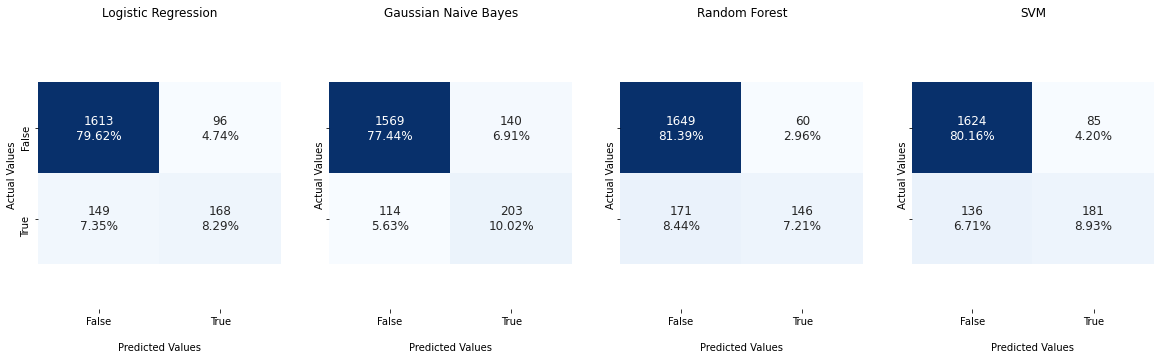

In [100]:

#plotting confusion matrix - on the validation data

#                             changing these parameters will plot the wanted confusion matrix according to it                                   #
#-----------------------------------------------------------------------------------------------------------------------------------------------#
#defying the chosen data set for easier use later on
train_chosen_data_x = X_train_PCA_p
train_chosen_data_y = y_train_PCA
val_chosen_data_x = X_valid_PCA_p
val_chosen_data_y = y_valid_PCA

#-----------------------------------------------------------------------------------------------------------------------------------------------#
#saving parameters for log loss and auccuracy loss graphs
over_fit_log = []

#-----------------------------------------------------------------------------------------------------------------------------------------------#
#define subplot grid
f, ax = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
plt.subplots_adjust(hspace=0.5)

#-------------------------------------------------------------------------------------------------------------#
log_reg = LogisticRegression().fit(train_chosen_data_x, train_chosen_data_y)


#predicting the values 
TrainVal_predict = log_reg.predict(val_chosen_data_x)
#setting confusion matrix
cm1 = confusion_matrix(val_chosen_data_y, TrainVal_predict)
#preparing the labels and plotting the matrix
group_counts = ["{0:0.0f}".format(value) for value in cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm1.flatten()/np.sum(cm1)]
labels1 = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels1 = np.asarray(labels1).reshape(2,2)

#plotting the matrix
sns.heatmap(cm1, annot = labels1,annot_kws={"size": 12}, cmap = 'Blues', fmt ='', cbar = False, ax=ax[0])

#setting titles
ax[0].set_title('Logistic Regression\n')
ax[0].set_xlabel('\nPredicted Values')
ax[0].set_ylabel('Actual Values ')

#ticket labels
ax[0].xaxis.set_ticklabels(['False','True'])
ax[0].yaxis.set_ticklabels(['False','True'])
bottom, top = ax[0].get_ylim()
ax[0].set_ylim(bottom + 0.5, top - 0.5)

#-------------------------------------------------------------------------------------------------------------#

GNB=GaussianNB().fit(train_chosen_data_x,train_chosen_data_y)

#predicting the values 
TrainVal_predict = GNB.predict(val_chosen_data_x)
#setting confusion matrix
cm2 = confusion_matrix(val_chosen_data_y, TrainVal_predict)
#preparing the labels and plotting the matrix
group_counts = ["{0:0.0f}".format(value) for value in cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm2.flatten()/np.sum(cm2)]
labels2 = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels2 = np.asarray(labels2).reshape(2,2)

#plotting the matrix
sns.heatmap(cm2, annot = labels2,annot_kws={"size": 12}, cmap = 'Blues', fmt ='', cbar = False, ax=ax[1])

#setting titles
ax[1].set_title('Gaussian Naive Bayes\n')
ax[1].set_xlabel('\nPredicted Values')
ax[1].set_ylabel('Actual Values ')

#ticket labels
ax[1].xaxis.set_ticklabels(['False','True'])
ax[1].yaxis.set_ticklabels(['False','True'])
bottom, top = ax[1].get_ylim()
ax[1].set_ylim(bottom + 0.5, top - 0.5)

#-------------------------------------------------------------------------------------------------------------#
#rand_for = RandomForestClassifier().fit(train_chosen_data_x, train_chosen_data_y)

#predicting the values 
TrainVal_predict = rf_clf_grid.predict(val_chosen_data_x)
#setting confusion matrix
cm3 = confusion_matrix(val_chosen_data_y, TrainVal_predict)
#preparing the labels and plotting the matrix
group_counts = ["{0:0.0f}".format(value) for value in cm3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm3.flatten()/np.sum(cm3)]
labels3 = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels3 = np.asarray(labels3).reshape(2,2)

#plotting the matrix
sns.heatmap(cm3, annot = labels3,annot_kws={"size": 12}, cmap = 'Blues', fmt ='', cbar = False, ax=ax[2])

#setting titles
ax[2].set_title('Random Forest\n')
ax[2].set_xlabel('\nPredicted Values')
ax[2].set_ylabel('Actual Values ')

#ticket labels
ax[2].xaxis.set_ticklabels(['False','True'])
ax[2].yaxis.set_ticklabels(['False','True'])
bottom, top = ax[2].get_ylim()
ax[2].set_ylim(bottom + 0.5, top - 0.5)

#-------------------------------------------------------------------------------------------------------------#
svm_model = svm.SVC(probability=True).fit(train_chosen_data_x, train_chosen_data_y)


#predicting the values 
TrainVal_predict = svm_model.predict(val_chosen_data_x)
#setting confusion matrix
cm4 = confusion_matrix(val_chosen_data_y, TrainVal_predict)
#preparing the labels and plotting the matrix
group_counts = ["{0:0.0f}".format(value) for value in cm4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm4.flatten()/np.sum(cm4)]
labels4 = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels4 = np.asarray(labels4).reshape(2,2)

#plotting the matrix
sns.heatmap(cm3, annot = labels4,annot_kws={"size": 12}, cmap = 'Blues', fmt ='', cbar = False, ax=ax[3])

#setting titles
ax[3].set_title('SVM\n')
ax[3].set_xlabel('\nPredicted Values')
ax[3].set_ylabel('Actual Values ')

#ticket labels
ax[3].xaxis.set_ticklabels(['False','True'])
ax[3].yaxis.set_ticklabels(['False','True'])
bottom, top = ax[3].get_ylim()
ax[3].set_ylim(bottom + 0.5, top - 0.5)

#-------------------------------------------------------------------------------------------------------------#

#display the visualization of the confusion matrix.
plt.show()

Let's look over the SVM confusion matrix: 

Out of 2026 cases in the validation set:
* 1624 cases of no-purchase were classified correctly (True Negative)
* 85 cases of no-purchase were NOT classified correctly (False Positive)
* 181 cases of purchase were classified correctly (True Positive)
* 136 cases of purchase were NOT classified correctly (False Negative)

Based on that, the performance metrics are:
* Accuracy = (1624+181)/2026 = 89.09%
* Precision = 181/(181+85) = 68.04%
* Recall = 181/(181+136) = 57.09%

For comparison, if my decision was always negative, I would get:
* True Negative = 1624+85 = 1709
* False Positive = 0
* True Positive = 0
* False Negative = 181+136 = 317 

And the metrics would be:
* Accuracy = 1709/2026 = 84.35%
* Precision = 0
* Recall = 0

### 6.2 ROC plot

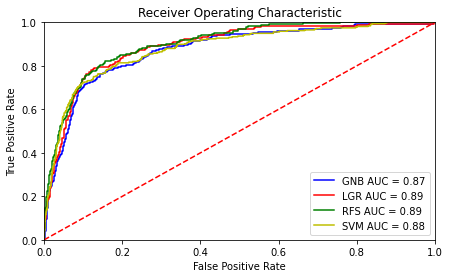

In [101]:
# Plot multiple ROCs 

def ROC(X_valid,X_train, y_valid,Y_train, gnb, log_reg, rfc, su_ve_m):
    # ROC GNB
    gnb.fit(X_train,Y_train)
    fpr_gb, tpr_gb, threshold_gb = metrics.roc_curve(y_valid, gnb.predict_proba(X_valid)[:, 1])
    roc_auc_gb = metrics.auc(fpr_gb, tpr_gb)

    # ROC Logisitc Regreesion
    log_reg.fit(X_train, Y_train)
    fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_valid, log_reg.predict_proba(X_valid)[:, 1])
    roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

    # ROC Random Forest
    rfc.fit(X_train, Y_train)
    fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_valid, rfc.predict_proba(X_valid)[:, 1])
    roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

    # ROC SVM
    su_ve_m.fit(X_train, Y_train)
    fpr_sv, tpr_sv, threshold_sv = metrics.roc_curve(y_valid, su_ve_m.predict_proba(X_valid)[:, 1])
    roc_auc_sv = metrics.auc(fpr_sv, tpr_sv)

    # Plotting ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_gb, tpr_gb, 'b', label = 'GNB AUC = %0.2f' % roc_auc_gb)
    plt.plot(fpr_lr, tpr_lr, 'r', label = 'LGR AUC = %0.2f' % roc_auc_lr)
    plt.plot(fpr_rf, tpr_rf, 'g', label = 'RFS AUC = %0.2f' % roc_auc_lr)
    plt.plot(fpr_sv, tpr_sv, 'y', label = 'SVM AUC = %0.2f' % roc_auc_sv)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



gnb=GaussianNB()
log_reg=LogisticRegression()
parameters3 = {'max_depth':[12], 'n_estimators':[100],'criterion':('gini','entropy')}
rfc = GridSearchCV(RandomForestClassifier(random_state=0), parameters3)
#rfc=RandomForestClassifier(random_state=0)
su_ve_m=svm.SVC(probability=True)
ROC(X_valid_PCA_p,X_train_PCA_p,y_valid_PCA,y_train_PCA,gnb,log_reg,rfc,su_ve_m)

ROC is an alternative to many confusion matrices. In the graph we plot a ROC for each of the models we tested. In order to know which of the models had the best score, we calculated the AUC and as we can see the Random Forest and Logistic Regression models had the highest AUC score.

### 6.3 K-fold Method

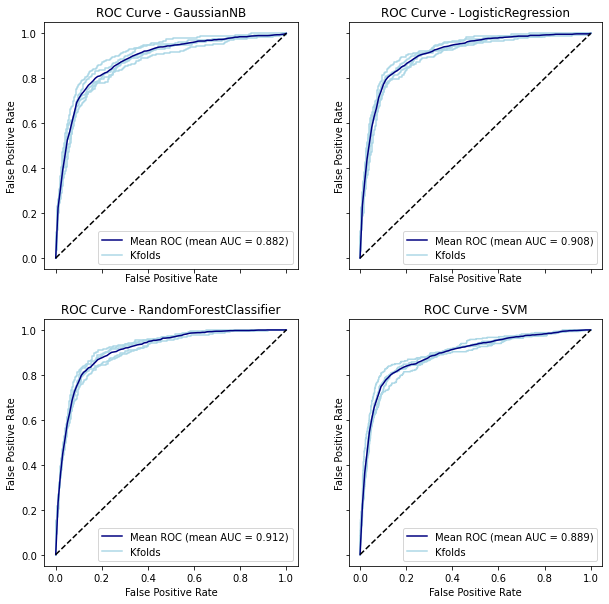

In [102]:
#prepare a figure for later
#define subplot grid
f, ax = plt.subplots(2, 2, figsize=(10, 10), sharex='col', sharey='row')
plt.subplots_adjust()

Nfold = 5
#-------------------------------------------------------------------------------------------------------------#

X1 = np.concatenate((X_train_PCA_p, X_valid_PCA_p), axis=0)
Y1 = np.concatenate((y_train_PCA, y_valid_PCA), axis=0)
clf1 = GaussianNB()

#initializing the KFOLD
kf = KFold(n_splits = Nfold, shuffle=False)
    
#initializing a counter 
counter = 1

#preparing variables for the ROC mean 
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X1):
    #fit the model
    #clf.fit(X.reindex(train_index), y.reindex(train_index))
    clf1.fit(X1[train_index], Y1[train_index])
        
    #The probability of getting 1 according to the model
    scores = clf1.predict_proba(X1[test_index])[:,1]
        
    #getting the fpr and tpr to set ROC for this fold
    fpr, tpr, thresholds = roc_curve(Y1[test_index], scores)
        
    #calculating the mean
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
                
    ax[0][0].plot(fpr,tpr, color ='lightblue')
        
    counter += 1


#divide the sum by the number of folds to get the mean
mean_tpr /= Nfold
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

#plotting the mean ROC

ax[0][0].plot(mean_fpr, mean_tpr, color='navy', label='Mean ROC (mean AUC = %0.3f)' % mean_auc)

#plotting the random guess line
ax[0][0].plot([0,1],[0,1], color = 'black', linestyle = '--')
ax[0][0].plot([0], [0], color = 'lightblue', linestyle='-', label='Kfolds')    
    
#setting all titles
ax[0][0].set_title('ROC Curve - GaussianNB')
ax[0][0].set_xlabel('False Positive Rate')
ax[0][0].set_ylabel('False Positive Rate')
ax[0][0].legend(loc="lower right")


#-------------------------------------------------------------------------------------------------------------#

X2 = np.concatenate((X_train_PCA_p, X_valid_PCA_p), axis=0)
Y2 = np.concatenate((y_train_PCA, y_valid_PCA), axis=0)
clf2 = LogisticRegression()


    
#initializing a counter 
counter = 1

#preparing variables for the ROC mean 
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X2):
    #fit the model
    #clf.fit(X.reindex(train_index), y.reindex(train_index))
    clf2.fit(X2[train_index], Y2[train_index])
        
    #The probability of getting 1 according to the model
    scores = clf2.predict_proba(X2[test_index])[:,1]
        
    #getting the fpr and tpr to set ROC for this fold
    fpr, tpr, thresholds = roc_curve(Y2[test_index], scores)
        
    #calculating the mean
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
                
    ax[0][1].plot(fpr,tpr, color ='lightblue')
        
    counter += 1


#divide the sum by the number of folds to get the mean
mean_tpr /= Nfold
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

#plotting the mean ROC

ax[0][1].plot(mean_fpr, mean_tpr, color='navy', label='Mean ROC (mean AUC = %0.3f)' % mean_auc)

#plotting the random guess line
ax[0][1].plot([0,1],[0,1], color = 'black', linestyle = '--')
ax[0][1].plot([0], [0], color = 'lightblue', linestyle='-', label='Kfolds')    
    
#setting all titles
ax[0][1].set_title('ROC Curve - LogisticRegression')
ax[0][1].set_xlabel('False Positive Rate')
ax[0][1].set_ylabel('False Positive Rate')
ax[0][1].legend(loc="lower right")

#-------------------------------------------------------------------------------------------------------------#

X3 = np.concatenate((X_train_PCA_p, X_valid_PCA_p), axis=0)
Y3 = np.concatenate((y_train_PCA, y_valid_PCA), axis=0)
#parameters3 = {'max_depth':[12], 'n_estimators':[100],'criterion':('gini','entropy')}
clf3 = GridSearchCV(RandomForestClassifier(random_state=0), parameters3)

    
#initializing a counter 
counter = 1

#preparing variables for the ROC mean 
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X3):
    #fit the model
    #clf.fit(X.reindex(train_index), y.reindex(train_index))
    clf3.fit(X3[train_index], Y3[train_index])
        
    #The probability of getting 1 according to the model
    scores = clf3.predict_proba(X3[test_index])[:,1]
        
    #getting the fpr and tpr to set ROC for this fold
    fpr, tpr, thresholds = roc_curve(Y3[test_index], scores)
        
    #calculating the mean
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
                
    ax[1][0].plot(fpr,tpr, color ='lightblue')
        
    counter += 1


#divide the sum by the number of folds to get the mean
mean_tpr /= Nfold
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

#plotting the mean ROC

ax[1][0].plot(mean_fpr, mean_tpr, color='navy', label='Mean ROC (mean AUC = %0.3f)' % mean_auc)

#plotting the random guess line
ax[1][0].plot([0,1],[0,1], color = 'black', linestyle = '--')
ax[1][0].plot([0], [0], color = 'lightblue', linestyle='-', label='Kfolds')    
    
#setting all titles
ax[1][0].set_title('ROC Curve - RandomForestClassifier')
ax[1][0].set_xlabel('False Positive Rate')
ax[1][0].set_ylabel('False Positive Rate')
ax[1][0].legend(loc="lower right")

#-------------------------------------------------------------------------------------------------------------#

X4 = np.concatenate((X_train_PCA_p, X_valid_PCA_p), axis=0)
Y4 = np.concatenate((y_train_PCA, y_valid_PCA), axis=0)
clf4 = svm.SVC(probability=True)


    
#initializing a counter 
counter = 1

#preparing variables for the ROC mean 
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X4):
    #fit the model
    #clf.fit(X.reindex(train_index), y.reindex(train_index))
    clf4.fit(X4[train_index], Y4[train_index])
        
    #The probability of getting 1 according to the model
    scores = clf4.predict_proba(X4[test_index])[:,1]
        
    #getting the fpr and tpr to set ROC for this fold
    fpr, tpr, thresholds = roc_curve(Y4[test_index], scores)
        
    #calculating the mean
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
                
    ax[1][1].plot(fpr,tpr, color ='lightblue')
        
    counter += 1


#divide the sum by the number of folds to get the mean
mean_tpr /= Nfold
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

#plotting the mean ROC

ax[1][1].plot(mean_fpr, mean_tpr, color='navy', label='Mean ROC (mean AUC = %0.3f)' % mean_auc)

#plotting the random guess line
ax[1][1].plot([0,1],[0,1], color = 'black', linestyle = '--')
ax[1][1].plot([0], [0], color = 'lightblue', linestyle='-', label='Kfolds')    
    
#setting all titles
ax[1][1].set_title('ROC Curve - SVM')
ax[1][1].set_xlabel('False Positive Rate')
ax[1][1].set_ylabel('False Positive Rate')
ax[1][1].legend(loc="lower right")

#-------------------------------------------------------------------------------------------------------------#

plt.show()

### 6.4 Checking for Overfitting

The function below is based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [103]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

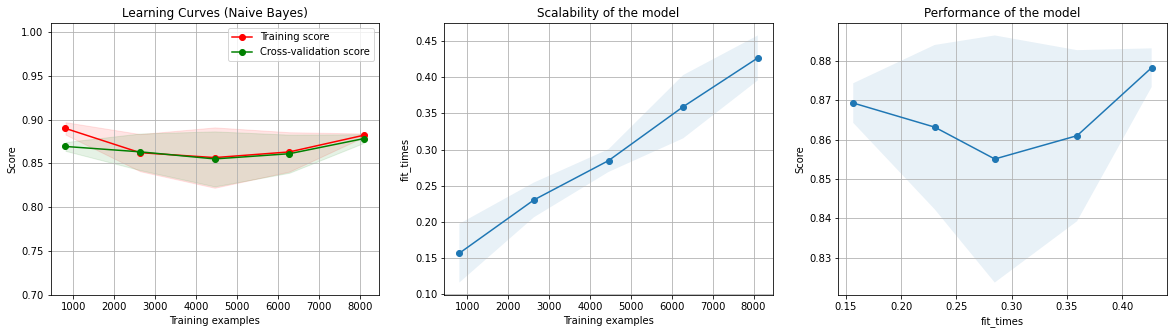

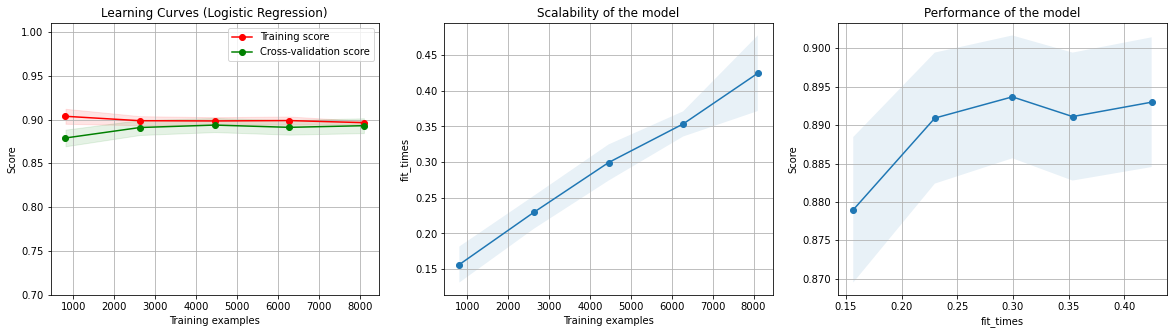

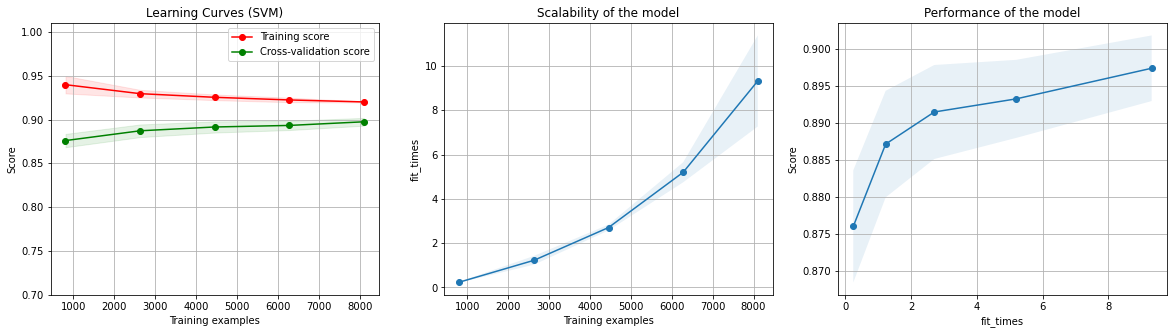

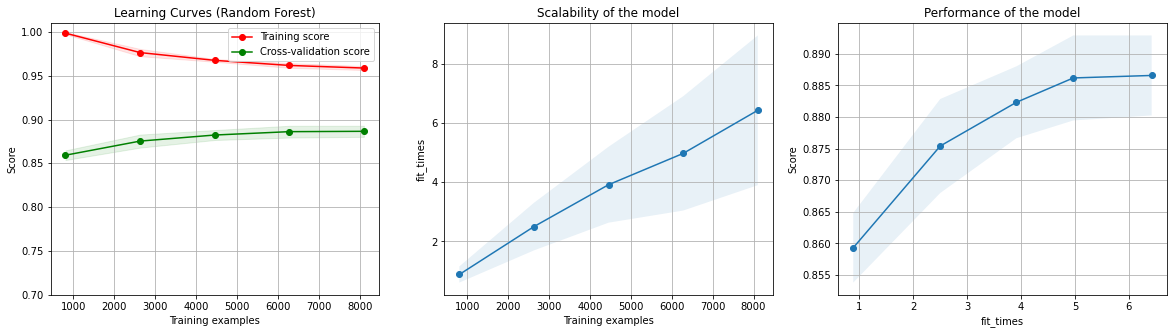

In [104]:
# Cross validation with 5 iterations
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scaler = preprocessing.PowerTransformer()
pca = PCA(0.99)

# -----------------
title = "Learning Curves (Naive Bayes)"

estimator = GaussianNB()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('clf', estimator)])

plot_learning_curve(
    pipe, title, df7, y7, cv=cv, ylim=(0.7, 1.01)
)
plt.show()

# -------------------
title = "Learning Curves (Logistic Regression)"

estimator = LogisticRegression()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('clf', estimator)])

plot_learning_curve(
    pipe, title, df7, y7, cv=cv, ylim=(0.7, 1.01)
)
plt.show()

# -------------------
title = "Learning Curves (SVM)"

estimator = svm.SVC(probability=True)
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('clf', estimator)])

plot_learning_curve(
    pipe, title, df7, y7, cv=cv, ylim=(0.7, 1.01)
)
plt.show()

# ------------------
title = "Learning Curves (Random Forest)"

# estimator = RandomForestClassifier(random_state=0)
estimator = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=10, n_estimators=100) # best params?
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('clf', estimator)])

plot_learning_curve(
    pipe, title, df7, y7, cv=cv, ylim=(0.7, 1.01)
)
plt.show()

### Observations:
1. Although Random Forest had the highest AUC score, when looking at the learning curve, we can see that for training sample size less than 4000, the difference between training and validation accuracy is much larger and stays large even while adding more training examples. This can indicate a case of overfitting.
2. The final dilemma was choosing between SVM and Logistic Regression. For training size greater than 5000, the models are better. It is a sign of good bias-variance trade-off. We prefer the performance graph of the SVM since it gets better with each iteration and at the final iteration it has a higher score. 
3. We thought we'll use the SVM approach, because we are concerned of over fitting in the Random Forest and are not clear about the Logistic Regression model.
4. After running the logisitic regression model and the SVM model on our training data, we discovered that the SVM model has a much better AUC score than Logistic Regression, therefore our assumption was true and we use the SVM model.

### 7. Prediction - Final Code that does it all

The final code block has the processing of the final data (df7), the same processing on test data, PCA on training and test data, SVM model on training and test data and finally prediction of probabilties for purchase on test data

In [105]:
# ------- handle training data
data = pd.read_csv('train.csv')
print("data size ",data.shape)

# cosmetic changes to data column names
data.columns= data.columns.str.lower()
data = data.rename(columns={'bouncerates': 'bounce_rates','exitrates': 'exit_rates','pagevalues':'page_values'})

# remove ' minutes' in data and convert to float
data['info_page_duration'] = data['info_page_duration'].str.replace(' minutes', '').astype('float')
data['product_page_duration'] = data['product_page_duration'].str.replace(' minutes', '').astype('float')

df7 = data.copy()
# remove the id column,B, D
df7.drop(['id','b','d'], inplace=True, axis=1)

# 2.1 replacing outliers in 'num_of_admin_pages' with calculated threshold
df7['num_of_admin_pages'].loc[df7['num_of_admin_pages'] > 15] = 12.3
df7['num_of_admin_pages'].fillna(0, inplace=True)

# 2.2 replacing outliers in 'admin_page_duration' with threshold
df7['admin_page_duration'].loc[df7['admin_page_duration'] > 1500] = 1500
df7['admin_page_duration'].fillna(0,inplace=True)

# 2.3 replacing outliers in 'num_of_info_pages' with threshold
df7['num_of_info_pages'].loc[df7['num_of_info_pages'] > 12] = 12
df7['num_of_info_pages'].fillna(0,inplace=True)

# 2.4 replacing outliers in 'info_page_duration' with most frequent value
df7['info_page_duration'].loc[df7['info_page_duration'] > 1500] = 0
df7['info_page_duration'].fillna(0,inplace=True)

# 2.5 replacing outliers in "num_of_product_pages" with threshold and replacing nulls with mean
df7['num_of_product_pages'].loc[df7['num_of_product_pages'] > 1500] = 166.32
df7['num_of_product_pages'].fillna(31.87,inplace=True)

# 2.6 replacing outliers in "product_page_duration" with threshold and replacing nulls with mean
df7['product_page_duration'].loc[df7['product_page_duration'] > 20000] = 20000
df7['product_page_duration'].fillna(1197.52,inplace=True)

# 2.7 dropping "total_duration" feature since it has a very high correlation (0.99) with product_page_duration
df7 = df7.drop(columns = ['total_duration'])

# 2.8 not removing outliers in "bounce_rates" because the outlier number is very small and they appear only when a purchase is made
# replacing nulls with 0
df7['bounce_rates'].fillna(0,inplace=True)

# 2.9 dropping "exit_rates" feature because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on your website. 
# Therefore, all bounces are exits but not all exits are bounces.
df7 = df7.drop(columns = ['exit_rates'])

# 2.10 replacing 2 outliers in "page_values" with threshold and replacing nulls with mean
df7['page_values'].loc[df7['page_values'] > 300] = 300
df7['page_values'].fillna(6,inplace=True) 

## Encoding user_type

# Changing all nulls of user_type to others
df7['user_type'].fillna('Other',inplace=True)

# Encoding user_type and removing two columns
ut_dummies= pd.get_dummies(df7['user_type'],prefix='user_type')
df7 = pd.concat([df7, ut_dummies], axis=1)
df7 = df7.drop(columns=['user_type_Other','user_type'])

## Encoding month

# dividing 'months' feature into 4 seasons to reduce number of features before encoding
season = pd.Series([])
df7['season']=season
df7.loc[df7["month"] == "Feb", "season"] = "winter"
df7.loc[df7["month"] == "Dec", "season"] = "winter"
df7.loc[df7["month"] == "Sep", "season"] = "fall"
df7.loc[df7["month"] == "Oct", "season"] = "fall"
df7.loc[df7["month"] == "Nov", "season"] = "fall"
df7.loc[df7["month"] == "June", "season"] = "summer"
df7.loc[df7["month"] == "Jul", "season"] = "summer"
df7.loc[df7["month"] == "Aug", "season"] = "summer"
df7.loc[df7["month"] == "Mar", "season"] = "spring"
df7.loc[df7["month"] == "May", "season"] = "spring"

# Encoding season (the new feature)

ut_dummies_1  = pd.get_dummies(df7['season'],prefix='season')
df7 = pd.concat([df7, ut_dummies_1], axis=1)
df7 = df7.drop(columns=['season','month'])

#replacing 25 nulls
df7['season_fall'].fillna(0,inplace=True)
df7['season_spring'].fillna(0,inplace=True)
df7['season_summer'].fillna(0,inplace=True)
df7['season_winter'].fillna(0,inplace=True)

## Encoding internet_browser

# adding a new column
is_chrome = pd.Series([])
df7['is_chrome']=is_chrome

# putting 1 when using chrome and 0 when not using chrome
df7.is_chrome[(df7['is_chrome'].isnull())&(df7['internet_browser'].str.contains('chrome'))] = 1
df7.is_chrome[(df7['is_chrome'].isnull())&(df7['internet_browser'].str.contains('chrome')==False)] = 0

# replaced nulls with 0 
df7['is_chrome'].fillna(0,inplace=True)

# dropping internet_browser column after encoding
df7 = df7.drop(columns='internet_browser')

## Encoding weekend

ut_dummies_2 = pd.get_dummies(df7['weekend'],prefix='on_weekend')
df7 = pd.concat([df7, ut_dummies_2], axis=1)

# dropping weekend column after encoding
df7.drop(['weekend','on_weekend_False'], inplace=True, axis=1)
df7.rename(columns = {'on_weekend_True':'on_weekend'} ,inplace = True)

## Encoding device

# Replacing nulls with most frequent device - (2.0)
df7['device'].fillna(2.0,inplace=True) 
ut_dummies_3= pd.get_dummies(df7['device'],prefix='device')
df7 = pd.concat([df7, ut_dummies_3], axis=1)
# dropping device column after encoding
df7.drop(['device'], inplace=True, axis=1)

## Encoding region

# Replacing nulls with most frequent region - (1.0)
df7['region'].fillna(1.0,inplace=True) 
ut_dummies_4= pd.get_dummies(df7['region'],prefix='region')
df7 = pd.concat([df7, ut_dummies_4], axis=1)
# dropping region column after encoding
df7.drop(['region'], inplace=True, axis=1)

## Encoding C

# Replacing 23 nulls with most frequent
df7['c'].fillna('log200',inplace=True) 
ut_dummies_5= pd.get_dummies(df7['c'],prefix='c')
df7 = pd.concat([df7, ut_dummies_5], axis=1)
# dropping c column after encoding
df7.drop(['c'], inplace=True, axis=1)

## Encoding closeness_to_holiday

# Replacing nulls with most frequent value - (0.0)
df7['closeness_to_holiday'].fillna(0.0,inplace=True)  
ut_dummies_6= pd.get_dummies(df7['closeness_to_holiday'],prefix='closeness_to_holiday')
df7 = pd.concat([df7, ut_dummies_6], axis=1)

# dropping closeness_to_holiday column after encoding
df7.drop(['closeness_to_holiday'], inplace=True, axis=1)

## Encoding A

# keeping only the 5 most frequent values
df7['A_c_1'] = (df7['a']=='c_1')
df7['A_c_2'] = (df7['a']=='c_2')
df7['A_c_3'] = (df7['a']=='c_3')
df7['A_c_4'] = (df7['a']=='c_4')
df7['A_c_13'] = (df7['a']=='c_13')

# dropping A column after encoding
df7.drop(['a'], inplace=True, axis=1)

# get label
y7 = df7['purchase']
df7.drop(['purchase'], inplace=True, axis=1)

print("data size after feature engineering ",df7.shape) 

#--------------------------------------------------------------------------------------------------------------------------------------#

# ------- handle test data (replacing values and modifying columns, but NOT dropping any lines)
test = pd.read_csv('test.csv')
print("test size ",test.shape)

# cosmetic changes to test column names
test.columns= test.columns.str.lower()
test = test.rename(columns={'bouncerates': 'bounce_rates','exitrates': 'exit_rates','pagevalues':'page_values'})

# remove ' minutes' in test and convert to float
test['info_page_duration'] = test['info_page_duration'].str.replace(' minutes', '').astype('float')
test['product_page_duration'] = test['product_page_duration'].str.replace(' minutes', '').astype('float')

t7= test.copy()
# remove the id column,B, D
t7.drop(['id','b','d'], inplace=True, axis=1)

# 2.1 replacing outliers in 'num_of_admin_pages' with calculated threshold
t7['num_of_admin_pages'].loc[t7['num_of_admin_pages'] > 15] = 12.3
t7['num_of_admin_pages'].fillna(0, inplace=True)

# 2.2 replacing outliers in 'admin_page_duration' with threshold
t7['admin_page_duration'].loc[t7['admin_page_duration'] > 1500] = 1500
t7['admin_page_duration'].fillna(0,inplace=True)

# 2.3 replacing outliers in 'num_of_info_pages' with threshold
t7['num_of_info_pages'].loc[t7['num_of_info_pages'] > 12] = 12
t7['num_of_info_pages'].fillna(0,inplace=True)

# 2.4 replacing outliers in 'info_page_duration' with most frequent value
t7['info_page_duration'].loc[t7['info_page_duration'] > 1500] = 0
t7['info_page_duration'].fillna(0,inplace=True)

# 2.5 replacing outliers in "num_of_product_pages" with threshold and replacing nulls with mean
t7['num_of_product_pages'].loc[t7['num_of_product_pages'] > 1500] = 166.32
t7['num_of_product_pages'].fillna(31.87,inplace=True)

# 2.6 replacing outliers in "product_page_duration" with threshold and replacing nulls with mean
t7['product_page_duration'].loc[t7['product_page_duration'] > 20000] = 20000
t7['product_page_duration'].fillna(1197.52,inplace=True)

# 2.7 dropping "total_duration" feature since it has a very high correlation (0.99) with product_page_duration
t7 = t7.drop(columns = ['total_duration'])

# 2.8 not removing outliers in "bounce_rates" because the outlier number is very small and they appear only when a purchase is made
# replacing nulls with 0
t7['bounce_rates'].fillna(0,inplace=True)

# 2.9 dropping "exit_rates" feature because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on your website. 
# Therefore, all bounces are exits but not all exits are bounces.
t7 = t7.drop(columns = ['exit_rates'])

# 2.10 replacing 2 outliers in "page_values" with threshold and replacing nulls with mean
t7['page_values'].loc[t7['page_values'] > 300] = 300
t7['page_values'].fillna(6,inplace=True) 

## Encoding user_type

# Changing all nulls of user_type to others
t7['user_type'].fillna('Other',inplace=True)

# Encoding user_type and removing two columns
ut_dummies= pd.get_dummies(t7['user_type'],prefix='user_type')
t7 = pd.concat([t7, ut_dummies], axis=1)
t7 = t7.drop(columns=['user_type_Other','user_type'])

## Encoding month

# dividing 'months' feature into 4 seasons to reduce number of features before encoding
season = pd.Series([])
t7['season']=season
t7.loc[t7["month"] == "Feb", "season"] = "winter"
t7.loc[t7["month"] == "Dec", "season"] = "winter"
t7.loc[t7["month"] == "Sep", "season"] = "fall"
t7.loc[t7["month"] == "Oct", "season"] = "fall"
t7.loc[t7["month"] == "Nov", "season"] = "fall"
t7.loc[t7["month"] == "June", "season"] = "summer"
t7.loc[t7["month"] == "Jul", "season"] = "summer"
t7.loc[t7["month"] == "Aug", "season"] = "summer"
t7.loc[t7["month"] == "Mar", "season"] = "spring"
t7.loc[t7["month"] == "May", "season"] = "spring"

# Encoding season (the new feature)

ut_dummies_1  = pd.get_dummies(t7['season'],prefix='season')
t7 = pd.concat([t7, ut_dummies_1], axis=1)
t7 = t7.drop(columns=['season','month'])

#replacing 25 nulls
t7['season_fall'].fillna(0,inplace=True)
t7['season_spring'].fillna(0,inplace=True)
t7['season_summer'].fillna(0,inplace=True)
t7['season_winter'].fillna(0,inplace=True)

## Encoding internet_browser

# adding a new column
is_chrome = pd.Series([])
t7['is_chrome']=is_chrome

# putting 1 when using chrome and 0 when not using chrome
t7.is_chrome[(t7['is_chrome'].isnull())&(t7['internet_browser'].str.contains('chrome'))] = 1
t7.is_chrome[(t7['is_chrome'].isnull())&(t7['internet_browser'].str.contains('chrome')==False)] = 0

# replaced nulls with 0 
t7['is_chrome'].fillna(0,inplace=True)

# dropping internet_browser column after encoding
t7 = t7.drop(columns='internet_browser')

## Encoding weekend

ut_dummies_2 = pd.get_dummies(t7['weekend'],prefix='on_weekend')
t7 = pd.concat([t7, ut_dummies_2], axis=1)

# dropping weekend column after encoding
t7.drop(['weekend','on_weekend_False'], inplace=True, axis=1)
t7.rename(columns = {'on_weekend_True':'on_weekend'} ,inplace = True)

## Encoding device

# Replacing nulls with most frequent device - (2.0)
t7['device'].fillna(2.0,inplace=True) 
ut_dummies_3= pd.get_dummies(t7['device'],prefix='device')
t7 = pd.concat([t7, ut_dummies_3], axis=1)
# dropping device column after encoding
t7.drop(['device'], inplace=True, axis=1)

## Encoding region

# Replacing nulls with most frequent region - (1.0)
t7['region'].fillna(1.0,inplace=True) 
ut_dummies_4= pd.get_dummies(t7['region'],prefix='region')
t7 = pd.concat([t7, ut_dummies_4], axis=1)
# dropping region column after encoding
t7.drop(['region'], inplace=True, axis=1)

## Encoding C

# Replacing 23 nulls with most frequent
t7['c'].fillna('log200',inplace=True) 
ut_dummies_5= pd.get_dummies(t7['c'],prefix='c')
t7 = pd.concat([t7, ut_dummies_5], axis=1)
# dropping c column after encoding
t7.drop(['c'], inplace=True, axis=1)

## Encoding closeness_to_holiday

# Replacing nulls with most frequent value - (0.0)
t7['closeness_to_holiday'].fillna(0.0,inplace=True)  
ut_dummies_6= pd.get_dummies(t7['closeness_to_holiday'],prefix='closeness_to_holiday')
t7 = pd.concat([t7, ut_dummies_6], axis=1)

# dropping closeness_to_holiday column after encoding
t7.drop(['closeness_to_holiday'], inplace=True, axis=1)

## Encoding A

# keeping only the 5 most frequent values
t7['A_c_1'] = (t7['a']=='c_1')
t7['A_c_2'] = (t7['a']=='c_2')
t7['A_c_3'] = (t7['a']=='c_3')
t7['A_c_4'] = (t7['a']=='c_4')
t7['A_c_13'] = (t7['a']=='c_13')

# dropping A column after encoding
t7.drop(['a'], inplace=True, axis=1)

print("test size after feature engineering ",t7.shape) 

#--------------------------------------------------------------------------------------------------------------------------------------#

# Running PCA on training data

# Trying Power Transformer instead of Standard Scaler

scaler = preprocessing.PowerTransformer().fit(df7)

X_train_scaled_p = scaler.transform(df7)

# Function for PCA components
def get_principal_components(X: np.array, p: float) -> np.array:
    pca = PCA(p).fit(X)
    return(pca.components_)
    
# PCA for PowerTransformer Data
components_p = get_principal_components(X_train_scaled_p,0.99)
print(f'number of components in training data which preserve at least 99% of the variance: {len(components_p)}')

# Transform features using PCA (PowerTransformer)
X_train_PCA_p = np.dot(X_train_scaled_p, components_p.T)

# PCA on test data
X_test_scaled_p = scaler.transform(t7)
X_test_PCA_p = np.dot(X_test_scaled_p, components_p.T)

#--------------------------------------------------------------------------------------------------------------------------------------#

# Running SVM model on training data and print AUC score

sup_vec_M = svm.SVC(probability=True).fit(X_train_PCA_p, y7)
auc_train = roc_auc_score(y7, sup_vec_M.predict_proba(X_train_PCA_p)[:, 1])
print("Support Vectors Machine - df7-final data:\n"+"Training AUC: "+ str(round(auc_train,4)))

#--------------------------------------------------------------------------------------------------------------------------------------#

# Prediction to test data using SVM model
y_pred = sup_vec_M.predict_proba(X_test_PCA_p)

# predicting the test set labels probabilities
y_test_proba=pd.DataFrame(y_pred[:,1])

print(y_test_proba)

#exporting the probability for the label "1" to a CSV file
y_test_proba.index.name = 'id'
y_test_proba.to_csv("Submission_group_6.csv", header=['predict_prob'])


data size  (10479, 23)
data size after feature engineering  (10479, 50)
test size  (1851, 22)
test size after feature engineering  (1851, 50)
number of components in training data which preserve at least 99% of the variance: 41
Support Vectors Machine - df7-final data:
Training AUC: 0.9399
             0
0     0.062947
1     0.062166
2     0.035853
3     0.083466
4     0.092782
5     0.060232
6     0.061321
7     0.023072
8     0.105087
9     0.105813
10    0.050502
11    0.019926
12    0.034956
13    0.056803
14    0.041133
15    0.062228
16    0.074879
17    0.064685
18    0.054241
19    0.027871
20    0.072085
21    0.106725
22    0.085655
23    0.043717
24    0.043206
25    0.057921
26    0.912473
27    0.551138
28    0.036675
29    0.757773
30    0.690034
31    0.006551
32    0.027582
33    0.014975
34    0.056751
35    0.163390
36    0.073855
37    0.009600
38    0.796200
39    0.059567
40    0.051609
41    0.028792
42    0.042515
43    0.015830
44    0.034068
45    0.017145
46  